# Capstone Project - HR Attrition Model

In [1]:
# Name: Murtaza Kanchwala 
# Mobile No: 8305309153
# E-mail: murtazakancwala1@gmail.com

## Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


## Importing the CSV file 

In [3]:
hr_data=pd.read_csv("HR_Employee_Attrition_Data.csv")
hr_data.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               3   
3                 3          4  Life Sciences              1               4   
4                 2          1        Medical              1               5   
5                 2          2  Life Sciences              1               6   
6                 3          3        Medical              1               7   
7                24          1  Life Sciences              1               8   
8                23          3  Life Sciences              1               9   
9                27          3        Medical              1              10   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   
5  ...                         3            80                 0   
6  ...                         1            80                 3   
7  ...                         2            80                 1   
8  ...                         2            80                 0   
9  ...                         2            80                 2   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   
5                  8                      2               2               7   
6                 12                      3               2               1   
7                  1                      2               3               1   
8                 10                      2               3               9   
9                 17                      3               2               7   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  
5                  7                        3                     6  
6                  0                        0                     0  
7                  0                        0                     0  
8                  7                        1             

# EDA  

### Size 

In [4]:
hr_copy = hr_data   # Creating a copy to perform various operations on it.
print(hr_copy.shape)
print(f'Total Records: {hr_copy.shape[0]}')
print(f'Total Features: {hr_copy.shape[1]}')

(2940, 35)
Total Records: 2940
Total Features: 35


### Value Counts for Target Variable

No     2466
Yes     474
Name: Attrition, dtype: int64


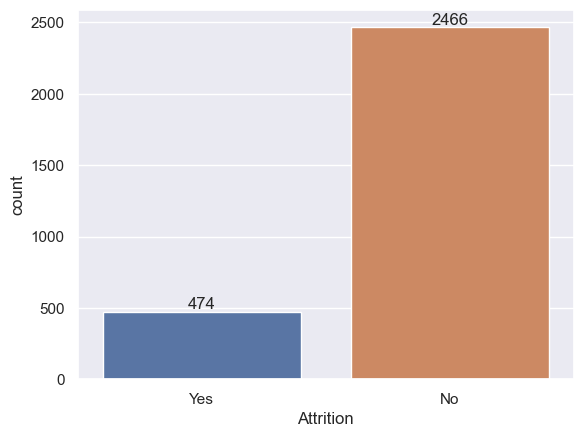

In [5]:
print(hr_copy["Attrition"].value_counts())
fg=sns.countplot(x='Attrition', data=hr_copy)
fg.bar_label(fg.containers[0])
plt.show()

- There is imbalance in Target variable, so we have to balance it during model building

### Column Names

In [6]:
hr_copy.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Numeric vs Non-Numeric columns

In [7]:
hr_copy.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### Checking for NULL Values

In [8]:
hr_copy.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### Insights
- There are no null values in any of the Features.

### Checking for the Duplicate Records

In [9]:
hr_copy.duplicated().sum()

0

- There is no presence of Duplicate Records.

### Checking number of  Unique Values in each column.

In [10]:
for i in hr_copy.columns:
    un=hr_copy[i].nunique()
    print(i,'=',un)
    print('-----------------------------------------------------------------------------------------------------')

Age = 43
-----------------------------------------------------------------------------------------------------
Attrition = 2
-----------------------------------------------------------------------------------------------------
BusinessTravel = 3
-----------------------------------------------------------------------------------------------------
DailyRate = 886
-----------------------------------------------------------------------------------------------------
Department = 3
-----------------------------------------------------------------------------------------------------
DistanceFromHome = 29
-----------------------------------------------------------------------------------------------------
Education = 5
-----------------------------------------------------------------------------------------------------
EducationField = 6
-----------------------------------------------------------------------------------------------------
EmployeeCount = 1
--------------------------------------

## Checking Unique values in each coulumns

In [11]:
for i in hr_copy:
    print('*******************************', i,'***********************************')
    print()
    print(hr_copy[i].unique())
    print()

******************************* Age ***********************************

[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]

******************************* Attrition ***********************************

['Yes' 'No']

******************************* BusinessTravel ***********************************

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

******************************* DailyRate ***********************************

[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353

#### Insights 
- The EmployeeCount column contains a single value for all the records i.e it is a zero variance column.
- The Standard_Hours column contains a single value for all the records i.e it is a zero variance column.
- The Over18 column contains a single value for all the records i.e it is a zero variance column.
- Some numerical continious columns needs to be converted in categorical coulmns for better analysis.


### Deleting Zero Varaience Columns.

In [12]:
# Deleting the columns having zero variance and also deleting the Employee Number feature.
hr_copy.drop(['EmployeeCount','StandardHours','Over18'],axis=1,inplace=True)

In [13]:
hr_copy.shape

(2940, 32)

# Univaritate Analysis

<Axes: xlabel='Age'>

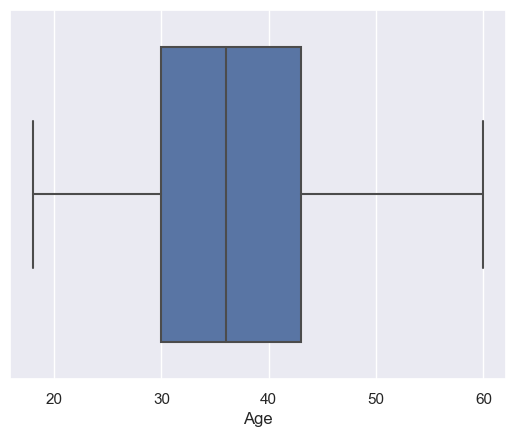

In [14]:
sns.boxplot(x='Age', data=hr_copy)

In [15]:
# Converting Age into the categorical column
print(hr_copy.Age.min())
print(hr_copy.Age.max())

18
60


In [16]:
def age_bin(dataset,col):
    for i in dataset[col].values:
        if i>=18 and i<=30:
            dataset[col]=dataset[col].replace(i,'18-30')
        elif i>30 and i<=40:
            dataset[col]=dataset[col].replace(i,'30-40')
        elif i>40 and i<=50:
            dataset[col]=dataset[col].replace(i,'40-50')
        elif i>50 and i<=60:
            dataset[col]=dataset[col].replace(i,'50-60')
    return dataset[col]

In [17]:
hr_copy.Age = age_bin(hr_copy,"Age")

In [18]:
hr_copy.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0  40-50       Yes      Travel_Rarely       1102                   Sales   
1  40-50        No  Travel_Frequently        279  Research & Development   
2  30-40       Yes      Travel_Rarely       1373  Research & Development   
3  30-40        No  Travel_Frequently       1392  Research & Development   
4  18-30        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               3   
3                 3          4  Life Sciences               4   
4                 2          1        Medical               5   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        2  ...                 3                         1   
1                        3  ...                 4                         4   
2                        4  ...                 3                         2   
3                        4  ...                 3                         3   
4                        1  ...                 3                         4   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 32 columns]

In [19]:
categorical =[]
numerical=[]
for i in hr_copy.columns:
    if hr_copy[i].dtype=='object':
        categorical.append(i)
    elif hr_copy[i].dtype=='int64':
        numerical.append(i)

In [20]:
print(f'Categorical: {categorical}')
print()
print(f'Numerical: {numerical}')

Categorical: ['Age', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

Numerical: ['DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


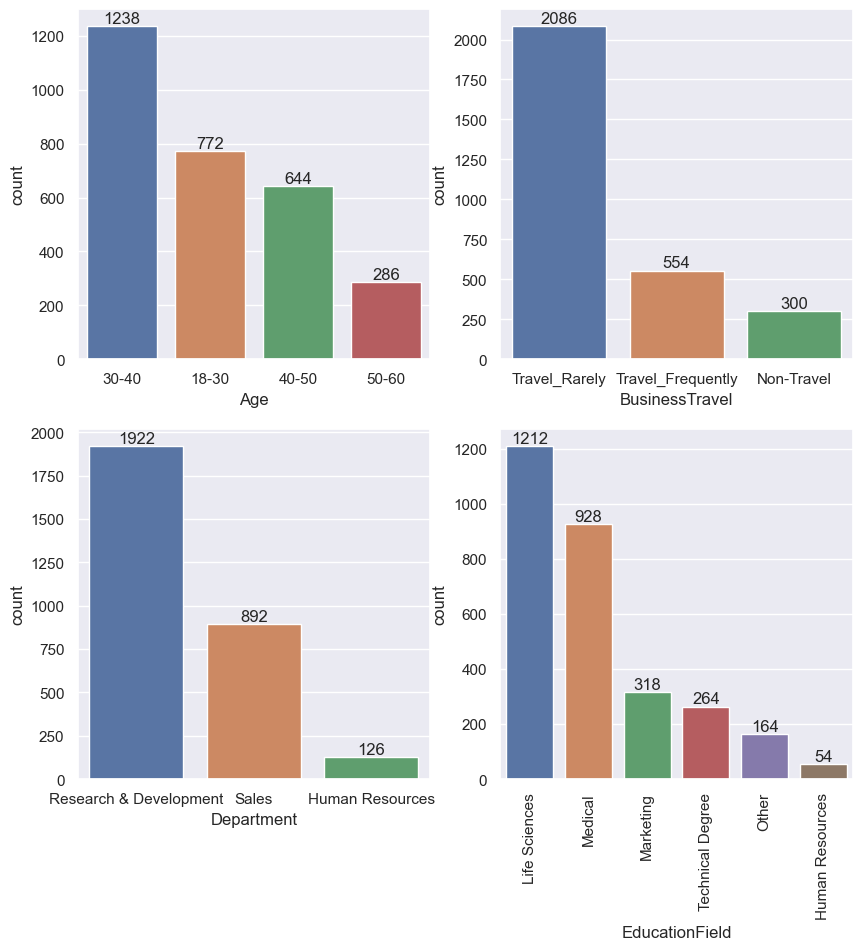

In [21]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
fg=sns.countplot(x='Age', data=hr_copy, order=hr_copy['Age'].value_counts().index)
fg.bar_label(fg.containers[0])

plt.subplot(2,2,2)
fg=sns.countplot(x='BusinessTravel', data=hr_copy)
fg.bar_label(fg.containers[0])

plt.subplot(2,2,3)
fg=sns.countplot(x='Department', data=hr_copy, order=hr_copy['Department'].value_counts().index)
fg.bar_label(fg.containers[0])

plt.subplot(2,2,4)
fg=sns.countplot(x='EducationField', data=hr_copy, order=hr_copy['EducationField'].value_counts().index)
plt.xticks(rotation=90)
fg.bar_label(fg.containers[0])


plt.show()

### Insights:
- Most of the employees belongs to the age group of 30-40 followed by 18-30.
- The most number of the employees are from Research & Development department.
- The maximum number of employees have LifeScience as their education field followed by Medical.

In [22]:
px.pie(data_frame=hr_copy, names="Gender",title='Gender')

In [23]:
px.pie(data_frame=hr_copy, names="OverTime",title='OverTime')

In [24]:
px.pie(data_frame=hr_copy, names="MaritalStatus",title='MaritalStatus')

In [25]:
px.pie(data_frame=hr_copy, names="WorkLifeBalance",title='WorkLifeBalance')

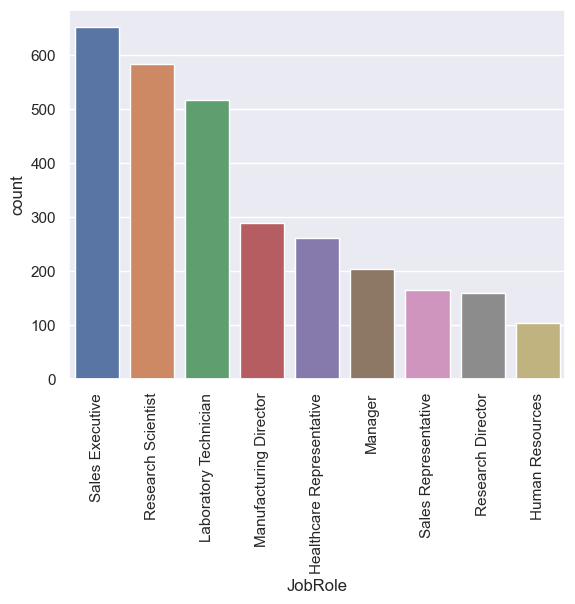

In [26]:
sns.countplot(x='JobRole', data=hr_copy, order=hr_copy['JobRole'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### Insights:
- Most of the employees are sales executive followed by Research scientist and Laboratory Technician

In [27]:
def box_plot(x):
    sns.boxplot(x=x, data=hr_copy)
    

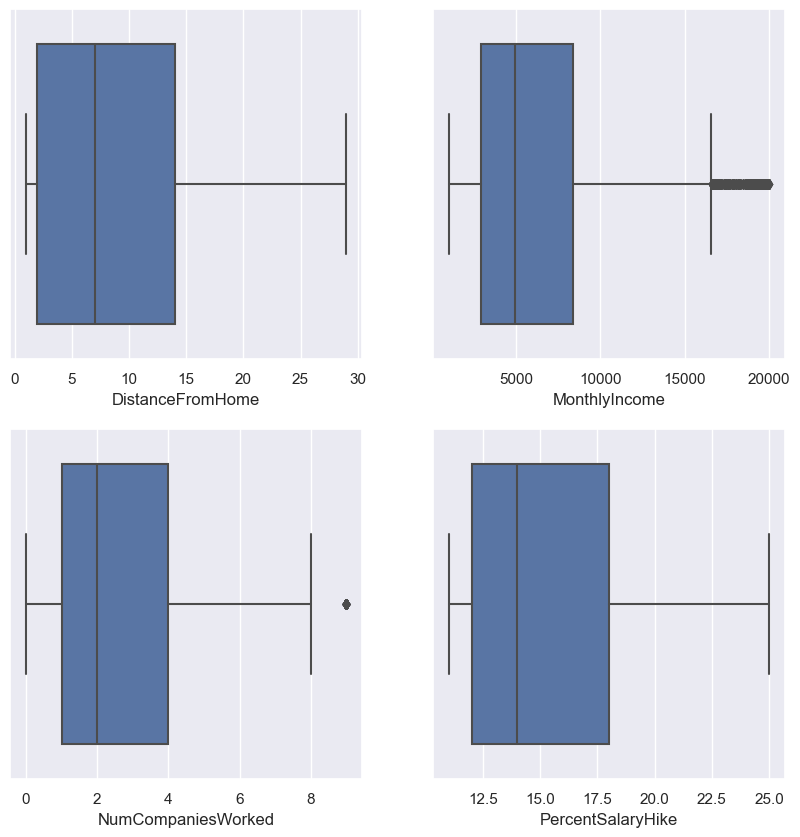

In [28]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
box_plot("DistanceFromHome")

plt.subplot(2,2,2)
box_plot("MonthlyIncome")

plt.subplot(2,2,3)
box_plot("NumCompaniesWorked")

plt.subplot(2,2,4)
box_plot("PercentSalaryHike")
plt.show()

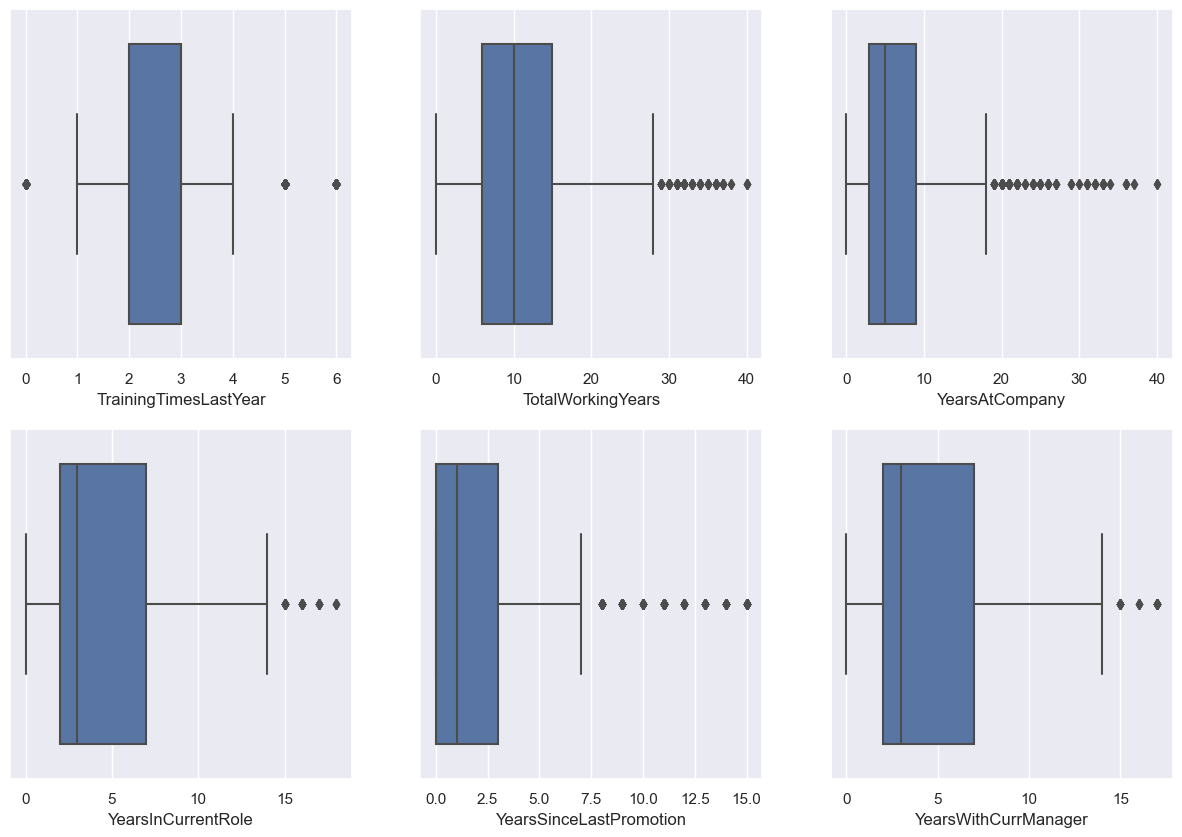

In [29]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
box_plot("TrainingTimesLastYear")

plt.subplot(2,3,2)
box_plot("TotalWorkingYears")

plt.subplot(2,3,3)
box_plot("YearsAtCompany")

plt.subplot(2,3,4)
box_plot("YearsInCurrentRole")

plt.subplot(2,3,5)
box_plot("YearsSinceLastPromotion")

plt.subplot(2,3,6)
box_plot("YearsWithCurrManager")
plt.show()

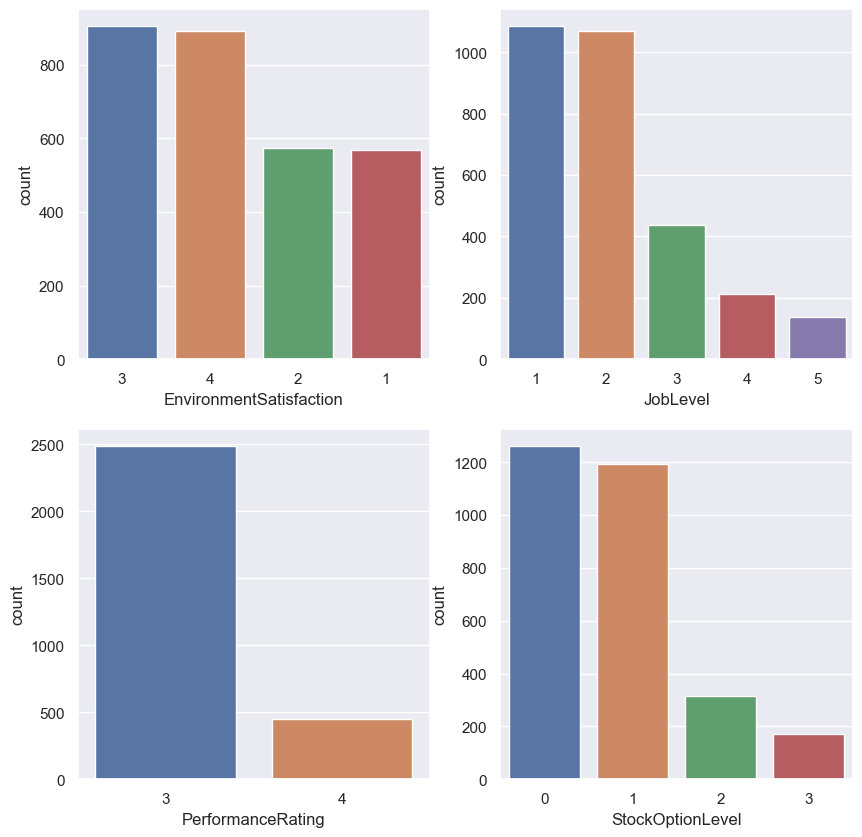

In [30]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x='EnvironmentSatisfaction', data=hr_copy, order=hr_copy['EnvironmentSatisfaction'].value_counts().index)

plt.subplot(2,2,2)
sns.countplot(x='JobLevel', data=hr_copy)

plt.subplot(2,2,3)
sns.countplot(x='PerformanceRating',data=hr_copy, order=hr_copy['PerformanceRating'].value_counts().index)

plt.subplot(2,2,4)
sns.countplot(x='StockOptionLevel', data=hr_copy, order=hr_copy['StockOptionLevel'].value_counts().index)



plt.show()

### Insights:
- Most employees have EnvironmentSatisfaction level of either 3 or 4.
- Most of the employees are working at eihter job level of 3 or 4.
- Maximum employees have a Performance Rating of 3.
- Most of the employees have eihter stock option level 0 or 1.

# Bivariate Analysis:

### AGE vs Attrition

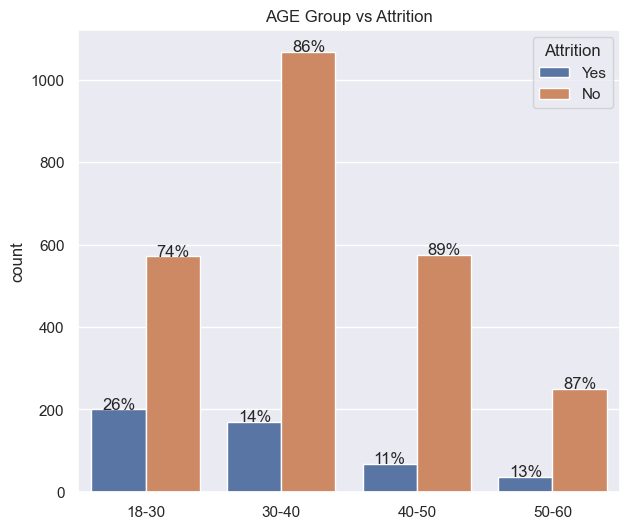

In [31]:
plt.figure(figsize=(7,6))
ax=sns.countplot(x="Age",data=hr_copy.sort_values(by="Age"),hue="Attrition")

c=len(ax.patches)
no =[]   # creating the list of the number of peoples having Attrition = NO for each Age group.
no_x=[]  # creating the list of the X-Coordinate of Attrition = NO for each Age group.
yes=[]   # creating the list of the number of peoples having Attrition = YES for each Age group.
yes_x=[] # creating the list of the X-Coordinate of Attrition = YES for each Age group.
for i in ax.patches:
    if c>(len(ax.patches))/2:
        yes.append(i.get_height())
        yes_x.append(i.get_x())
        c-=1
    else:
        no.append(i.get_height())
        no_x.append(i.get_x())
        c-=1
for j in range(len(no)):
    value=str(round(no[j]/(yes[j]+no[j])*100))+"%"  # Fetching the percentage of people having Attrition=NO for each Age group
    x=no_x[j]+0.08
    y=no[j]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=NO for each Age group on the graph.
for k in range(len(yes)):
    value=str(round(yes[k]/(yes[k]+no[k])*100))+"%"  # Fetching the percentage of people having Attrition=YES for each Age group
    x=yes_x[k]+0.08
    y=yes[k]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=YES for each Age group on the graph.
plt.title("AGE Group vs Attrition")
plt.xlabel(None)
plt.show()

#### Insights :
- The above graph gives the percentage of Attrition of a particular age group on the basis of the total number of peoples present in that particular age group.

- The graph shows that, the most number of Attrition is in the Age group of __"18-30"__ i.e __26%__ of employees having age between 18-30 out of the total employees having the age between 18-30 have the chances of Attrition. 

- The graph shows that, the least number of Attrition is in the Age group of __"50-60"__. 

### Business Travel vs Attrition

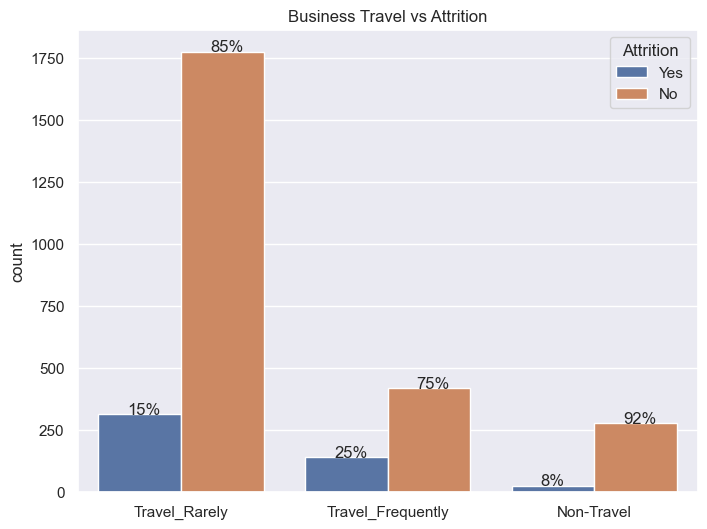

In [32]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x="BusinessTravel",hue="Attrition",data=hr_copy)
c=len(ax.patches)
yes =[]   # creating the list of the number of peoples having Attrition = YES for each travel group.
yes_x=[]  # creating the list of the X-Coordinate of Attrition = YES for each travel group.
no=[]   # creating the list of the number of peoples having Attrition = NO for each travel group.
no_x=[] # creating the list of the X-Coordinate of Attrition = NO for each travel group.
for i in ax.patches:
    if c>(len(ax.patches))/2:
        yes.append(i.get_height())
        yes_x.append(i.get_x())
        c-=1
    else:
        no.append(i.get_height())
        no_x.append(i.get_x())
        c-=1
for j in range(len(no)):
    value=str(round(no[j]/(yes[j]+no[j])*100))+"%"   # Fetching the percentage of people having Attrition=NO for each travel group
    x=no_x[j]+0.14
    y=no[j]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=NO for each travel group on the graph.
for k in range(len(yes)):
    value=str(round(yes[k]/(yes[k]+no[k])*100))+"%"  # Fetching the percentage of people having Attrition=YES for each travel group
    x=yes_x[k]+0.14
    y=yes[k]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=YES for each travel group on the graph.
plt.title("Business Travel vs Attrition")
plt.xlabel(None)
plt.show()

#### Insights from the graph:
- 25% of the total employees who travels frequently out of total number of employees present in the Travel_Frequently category, have the chances of Attrition, which is the highest Attrition rate amongst all the categories.
- The least amount of Attrition rate is in Non Travel group. 


### Department vs Attrition

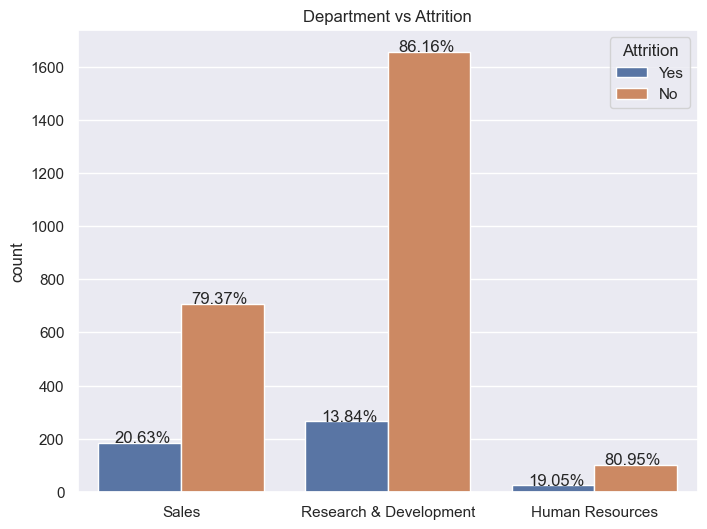

In [33]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x="Department",hue="Attrition",data=hr_copy)
c=len(ax.patches)
no =[]   # creating the list of the number of peoples having Attrition = NO for each Department.
no_x=[]  # creating the list of the X-Coordinate of Attrition = NO for each Department.
yes=[]   # creating the list of the number of peoples having Attrition = YES for each Department.
yes_x=[] # creating the list of the X-Coordinate of Attrition = YES for each Department.
for i in ax.patches:
    if c>(len(ax.patches))/2:
        no.append(i.get_height())
        no_x.append(i.get_x())
        c-=1
    else:
        yes.append(i.get_height())
        yes_x.append(i.get_x())
        c-=1
for j in range(len(no)):
    value=str(round((no[j]/(yes[j]+no[j])*100),2))+"%"  # Fetching the percentage of people having Attrition=NO for each Department
    x=no_x[j]+0.08
    y=no[j]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=NO for each Department on the graph.
for k in range(len(yes)):
    value=str(round((yes[k]/(yes[k]+no[k])*100),2))+'%' # Fetching the percentage of people having Attrition=YES for each Department
    x=yes_x[k]+0.05
    y=yes[k]+1
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=YES for each Department on the graph.
plt.title("Department vs Attrition")
plt.xlabel(None)
plt.show()

#### Insights: 
- The Attrition Rate is __highest__ in the __Sales department__ and __Human Resources__ i.e around 21% and 19% of the employees out of the total number of employees working in the sales department and Human Resources respectively have the chances of Attrition .
- The Attrition rate is __lowest__ in the __R&D department__.

### Gender VS Attrition

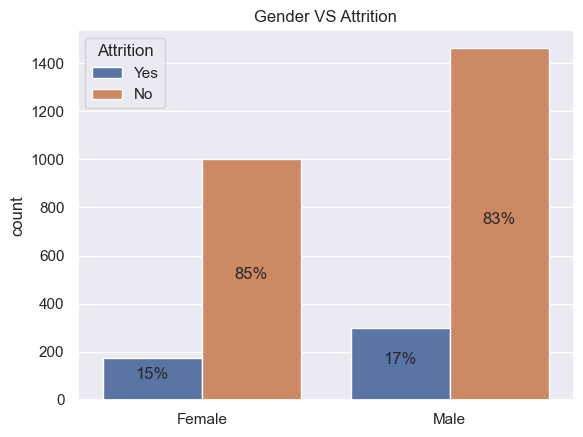

In [34]:
ax=sns.countplot(x="Gender",hue="Attrition",data=hr_copy)
c=len(ax.patches)
no =[]   # creating the list of the number of peoples having Attrition = NO for each Department.
no_x=[]  # creating the list of the X-Coordinate of Attrition = NO for each Department.
yes=[]   # creating the list of the number of peoples having Attrition = YES for each Department.
yes_x=[] # creating the list of the X-Coordinate of Attrition = YES for each Department.
for i in ax.patches:
    if c>(len(ax.patches))/2:
        no.append(i.get_height())
        no_x.append(i.get_x())
        c-=1
    else:
        yes.append(i.get_height())
        yes_x.append(i.get_x())
        c-=1
for j in range(len(no)):
    value=str(round((no[j]/(yes[j]+no[j]))*100))+"%"  # Fetching the percentage of people having Attrition=NO for each Department
    x=no_x[j]+0.13
    y=no[j]/2
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=NO for each Department on the graph.
for k in range(len(yes)):
    value=str(round((yes[k]/(yes[k]+no[k]))*100))+"%" # Fetching the percentage of people having Attrition=YES for each Department
    x=yes_x[k]+0.13
    y=yes[k]/2
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=YES for each Department on the graph.
plt.xlabel(None)
plt.title("Gender VS Attrition")
plt.show()

#### Insights 
- There is as such no relationship between gender and Attrition as both the genders have statstically same chances of Attrition.

### Education field vs Attrition

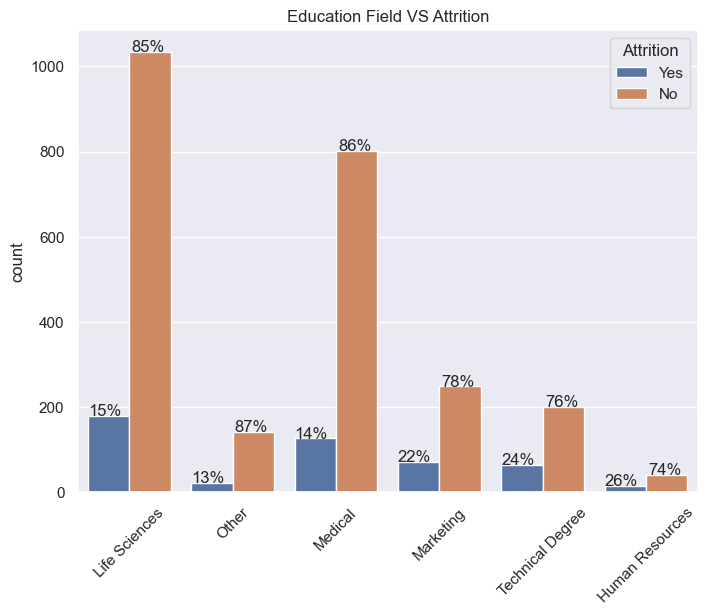

In [35]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x="EducationField",hue="Attrition",data=hr_copy)
c=len(ax.patches)
no =[]   # creating the list of the number of peoples having Attrition = NO for each Education Field.
no_x=[]  # creating the list of the X-Coordinate of Attrition = NO for each Education Field.
yes=[]   # creating the list of the number of peoples having Attrition = YES for each Education Field.
yes_x=[] # creating the list of the X-Coordinate of Attrition = YES for each Education Field.
for i in ax.patches:
    if c>(len(ax.patches))/2:
        no.append(i.get_height())
        no_x.append(i.get_x())
        c-=1
    else:
        yes.append(i.get_height())
        yes_x.append(i.get_x())
        c-=1
for j in range(len(no)):
    value=str(round((no[j]/(yes[j]+no[j]))*100))+"%"  # Fetching the percentage of people having Attrition=NO for each Education Field
    x=no_x[j]-0.001
    y=no[j]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=NO for each Education Field on the graph.
for k in range(len(yes)):
    value=str(round((yes[k]/(yes[k]+no[k]))*100))+"%" # Fetching the percentage of people having Attrition=YES for each Education Field
    x=yes_x[k]+0.02
    y=yes[k]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=YES for each Education Field on the graph.
plt.xticks(rotation=45)
plt.title("Education Field VS Attrition")
plt.xlabel(None)
plt.show()

#### Insights
- The Employees having Education in Marketing, Technical and HR have the high rate of Attrition.

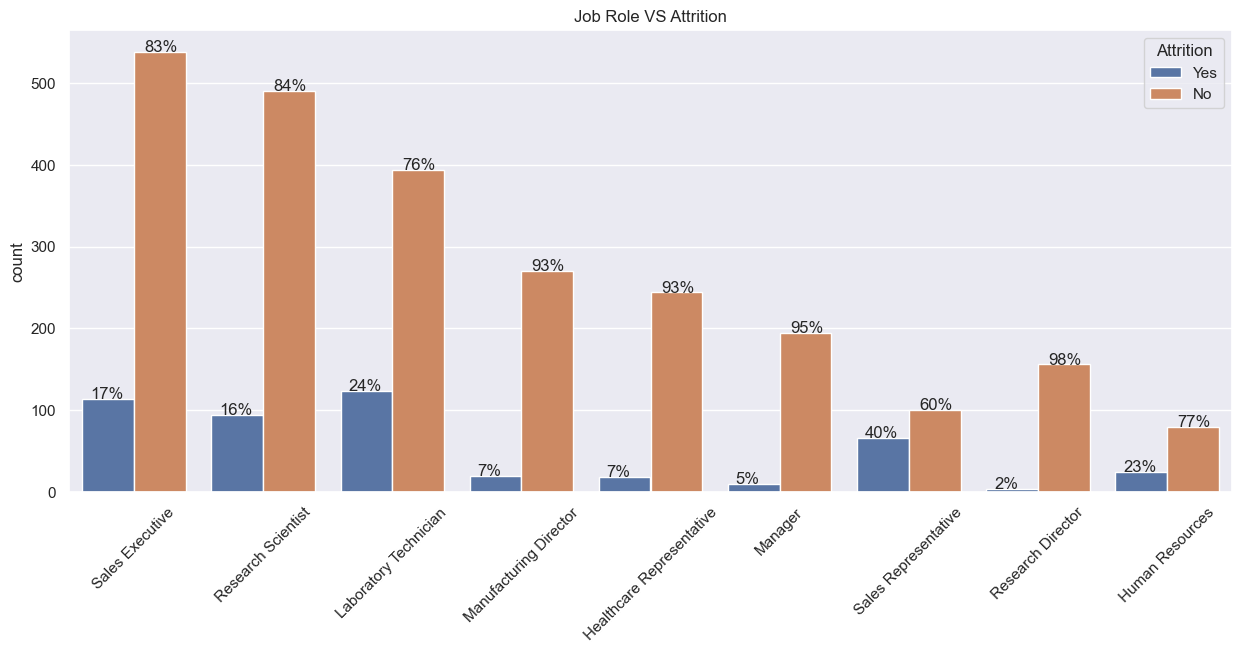

In [36]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x="JobRole",hue="Attrition",data=hr_copy)
c=len(ax.patches)
no =[]   # creating the list of the number of peoples having Attrition = NO for each JobLevel group.
no_x=[]  # creating the list of the X-Coordinate of Attrition = NO for each JobLevel group.
yes=[]   # creating the list of the number of peoples having Attrition = YES for each JobLevel group.
yes_x=[] # creating the list of the X-Coordinate of Attrition = YES for each JobLevel group.
for i in ax.patches:
    if c>(len(ax.patches))/2:
        no.append(i.get_height())
        no_x.append(i.get_x())
        c-=1
    else:
        yes.append(i.get_height())
        yes_x.append(i.get_x())
        c-=1
for j in range(len(no)):
    value=str(round((no[j]/(yes[j]+no[j]))*100))+"%"  # Fetching the percentage of people having Attrition=NO for each JobLevel group
    x=no_x[j]+0.06
    y=no[j]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=NO for each JobLevel group on the graph.
for k in range(len(yes)):
    value=str(round((yes[k]/(yes[k]+no[k]))*100))+"%" # Fetching the percentage of people having Attrition=YES for each JobLevel group
    x=yes_x[k]+0.08
    y=yes[k]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=YES for each JobLevel group on the graph
plt.xticks(rotation=45)
plt.title("Job Role VS Attrition")
plt.xlabel(None)
plt.show()

#### Insights:
- The Attrition Rate is __highest__ in the __Sales Representative Group__ i.e around 40% of the employees out of the total number of employees working as the sales Representative have the chances of Attrition .
- After sales representative, Laboratory Technician and HR has the high rate of attrition i.e almost 24%.

### Creating subplots by taking different variables for analysing purpose.

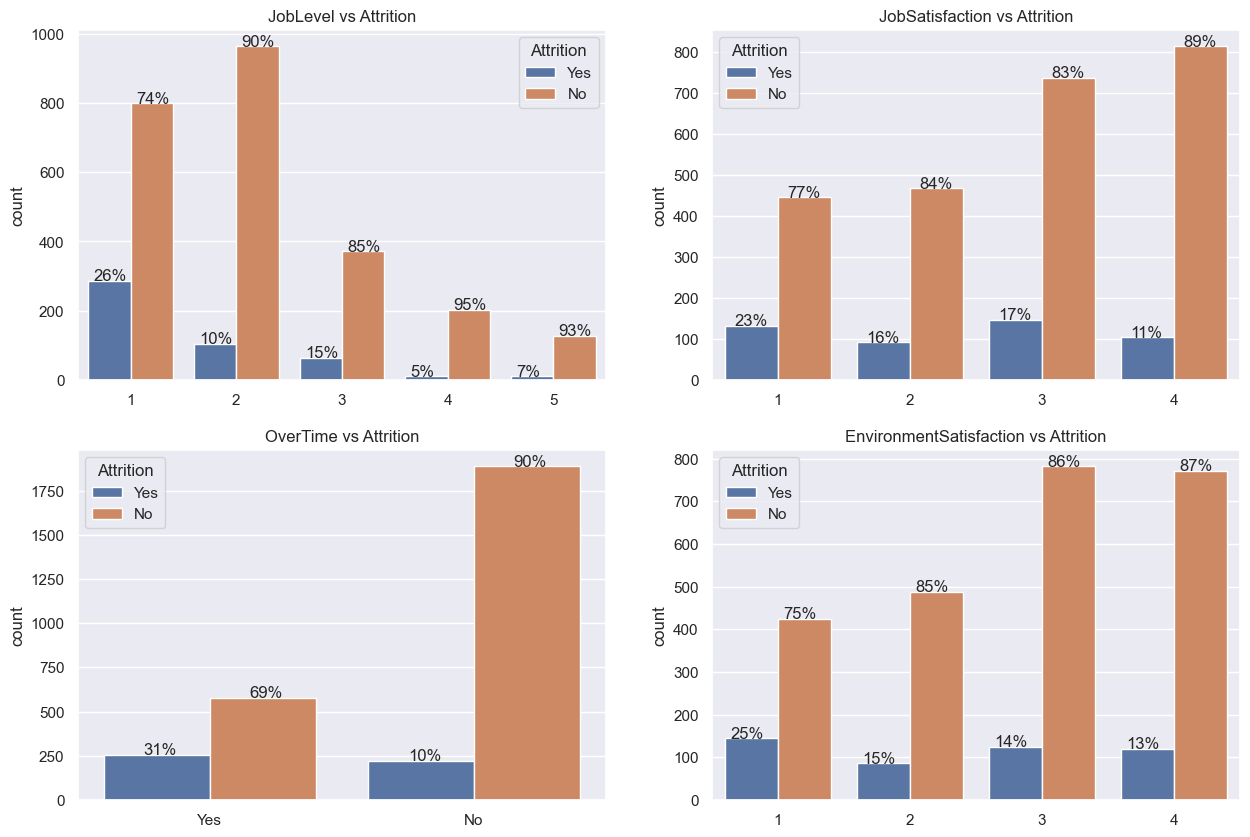

In [37]:
fig =plt.figure(figsize=(15,10))

# ploting First subplot between JobLevel vs Attrition

fig.add_subplot(2,2,1)
ax=sns.countplot(x="JobLevel",hue="Attrition",data=hr_copy)
c=len(ax.patches)
no =[]   # creating the list of the number of peoples having Attrition = NO for each JobLevel group.
no_x=[]  # creating the list of the X-Coordinate of Attrition = NO for each JobLevel group.
yes=[]   # creating the list of the number of peoples having Attrition = YES for each JobLevel group.
yes_x=[] # creating the list of the X-Coordinate of Attrition = YES for each JobLevel group.
for i in ax.patches:
    if c>(len(ax.patches))/2:
        no.append(i.get_height())
        no_x.append(i.get_x())
        c-=1
    else:
        yes.append(i.get_height())
        yes_x.append(i.get_x())
        c-=1
for j in range(len(no)):
    value=str(round((no[j]/(yes[j]+no[j]))*100))+"%" # Fetching the percentage of people having Attrition=NO for each JobLevel group
    x=no_x[j]+0.05
    y=no[j]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=NO for each JobLevel group on the graph.
for k in range(len(yes)):
    value=str(round((yes[k]/(yes[k]+no[k]))*100))+"%" # Fetching the percentage of people having Attrition=YES for each JobLevel group
    x=yes_x[k]+0.05
    y=yes[k]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=YES for each JobLevel group on the graph.
plt.xlabel(None)
plt.title("JobLevel vs Attrition")
    
    
# Plotting second subplot between JobSatisfaction vs Attrition

fig.add_subplot(2,2,2)
ax=sns.countplot(x="JobSatisfaction",hue="Attrition",data=hr_copy)
c=len(ax.patches)
no =[]   # creating the list of the number of peoples having Attrition = NO for each category of JobSatisfaction.
no_x=[]  # creating the list of the X-Coordinate of Attrition = NO for each category of JobSatisfaction.
yes=[]   # creating the list of the number of peoples having Attrition = YES for each category of JobSatisfaction.
yes_x=[] # creating the list of the X-Coordinate of Attrition = YES for each category of JobSatisfaction.
for i in ax.patches:
    if c>(len(ax.patches))/2:
        no.append(i.get_height())
        no_x.append(i.get_x())
        c-=1
    else:
        yes.append(i.get_height())
        yes_x.append(i.get_x())
        c-=1
for j in range(len(no)):
    value=str(round((no[j]/(yes[j]+no[j]))*100))+"%"  # Fetching the percentage of people having Attrition=NO for each category of JobSatisfaction
    x=no_x[j]+0.07
    y=no[j]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=NO for each category of JobSatisfaction on the graph.
for k in range(len(yes)):
    value=str(round((yes[k]/(yes[k]+no[k]))*100))+"%" # Fetching the percentage of people having Attrition=YES for each category of JobSatisfaction
    x=yes_x[k]+0.07
    y=yes[k]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=YES for each category of JobSatisfaction on the graph
plt.xlabel(None)
plt.title("JobSatisfaction vs Attrition")
    
    
    

# Plotting third subplot between OverTime vs Attrition

fig.add_subplot(2,2,3)
ax=sns.countplot(x="OverTime",hue="Attrition",data=hr_copy)
c=len(ax.patches)
no =[]   
no_x=[]  
yes=[]   
yes_x=[] 
for i in ax.patches:
    if c>(len(ax.patches))/2:
        no.append(i.get_height())
        no_x.append(i.get_x())
        c-=1
    else:
        yes.append(i.get_height())
        yes_x.append(i.get_x())
        c-=1
for j in range(len(no)):
    value=str(round((no[j]/(yes[j]+no[j]))*100))+"%"  # Fetching the percentage of people having Attrition=NO for overtime.
    x=no_x[j]+0.15
    y=no[j]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=NO for OverTime on the graph.
for k in range(len(yes)):
    value=str(round((yes[k]/(yes[k]+no[k]))*100))+"%" # Fetching the percentage of people having Attrition=YES for OverTime
    x=yes_x[k]+0.15
    y=yes[k]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=YES for OverTime on the graph.
plt.xlabel(None)
plt.title("OverTime vs Attrition")
    
    
    
    
    
    
# Plotting fourth subplot between EnvironmentSatisfaction vs Attrition

fig.add_subplot(2,2,4)
ax=sns.countplot(x="EnvironmentSatisfaction",hue="Attrition",data=hr_copy)
c=len(ax.patches)
no =[]   # creating the list of the number of peoples having Attrition = NO for each level of EnvironmentSatisfaction.
no_x=[]  # creating the list of the X-Coordinate of Attrition = NO for each level of EnvironmentSatisfaction.
yes=[]   # creating the list of the number of peoples having Attrition = YES for each level of EnvironmentSatisfaction.
yes_x=[] # creating the list of the X-Coordinate of Attrition = YES for each level of EnvironmentSatisfaction.
for i in ax.patches:
    if c>(len(ax.patches))/2:
        no.append(i.get_height())
        no_x.append(i.get_x())
        c-=1
    else:
        yes.append(i.get_height())
        yes_x.append(i.get_x())
        c-=1
for j in range(len(no)):
    value=str(round((no[j]/(yes[j]+no[j]))*100))+"%" # Fetching the percentage of people having Attrition=NO for each level of EnvironmentSatisfaction
    x=no_x[j]+0.04
    y=no[j]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=NO for each level of EnvironmentSatisfaction on the graph.
for k in range(len(yes)):
    value=str(round((yes[k]/(yes[k]+no[k]))*100))+"%" # Fetching the percentage of people having Attrition=YES for each level of EnvironmentSatisfaction
    x=yes_x[k]+0.04
    y=yes[k]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=YES for each level of EnvironmentSatisfaction on the graph.
plt.xlabel(None)
plt.title("EnvironmentSatisfaction vs Attrition")
plt.show()

### Insights:

#### Subplot-1 (JobLevel and Attrition):
- The Employees who are on Level-1, have the highest chances of Attriton (i.e 26%) than the rest of the Joblevel. 
- Rest of the Levels have more or less stastically similar rate of Attrition.

#### Subplot-2 (Jobsatisfaction and Attrition):
- The Employees who have Level-1 of JobSatisfaction, have the highest chances of Attriton (i.e 23%) than the rest of the levels. 
- Other Levels have more or less stastically similar rate of Attrition.

#### Subplot-3 (Overtime and Attrition):
- The Employees who are doing Overtime have the higher Attrition rate (i.e 31%) as compared to the Employees who are not doing overtime (they have attrition rate of only 10%).

#### Subplot-4 (Enviornmentsatisfaction and Attrition):
- The Employees who have rated the Level-1 of EnviornmentSatisfaction, have the highest chances of Attriton (i.e 25%) than the rest of the levels. 
- Other Levels have more or less stastically similar rate of Attrition.

### Creating subplots by taking different variables for analysing purpose.

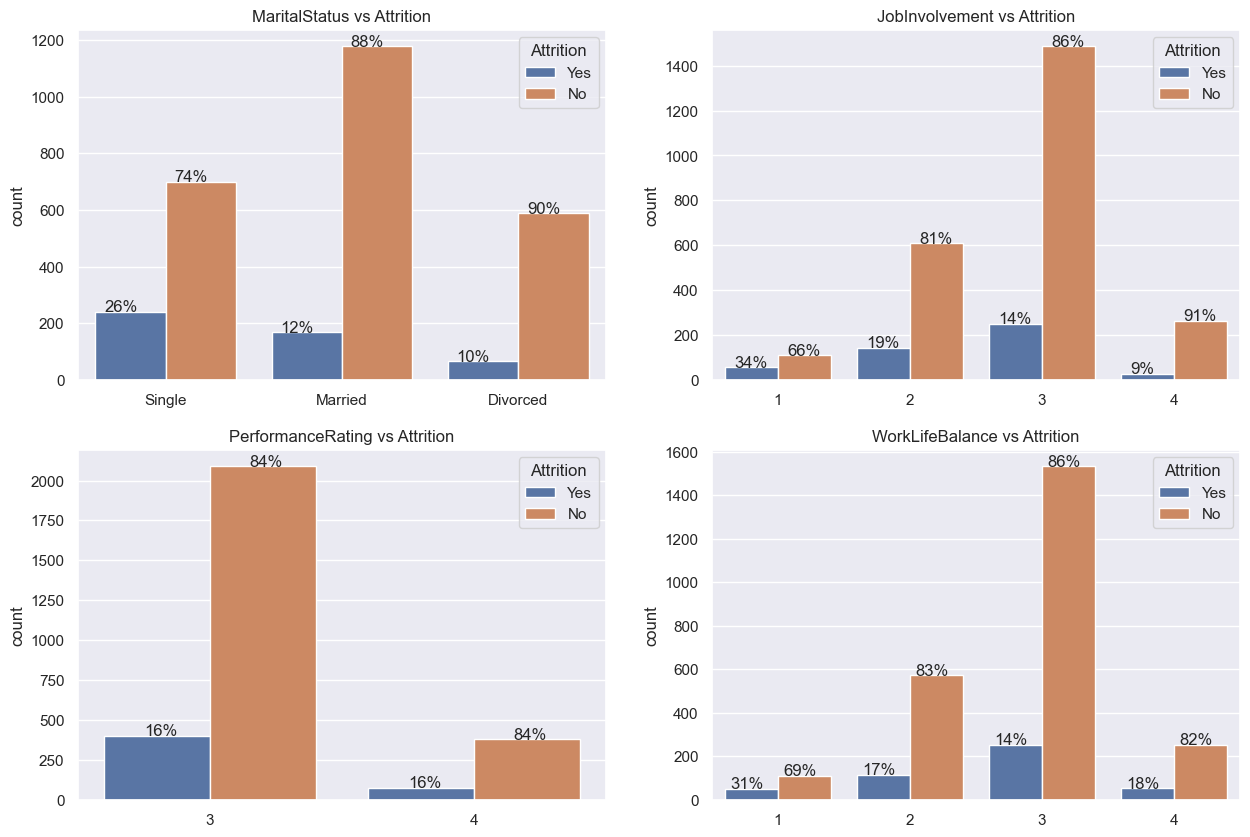

In [38]:
fig =plt.figure(figsize=(15,10))

# ploting First subplot between MaritalStatus vs Attrition

fig.add_subplot(2,2,1)
ax=sns.countplot(x="MaritalStatus",hue="Attrition",data=hr_copy)
c=len(ax.patches)
no =[]   # creating the list of the number of peoples having Attrition = NO for each MaritalStatus group.
no_x=[]  # creating the list of the X-Coordinate of Attrition = NO for each MaritalStatus group.
yes=[]   # creating the list of the number of peoples having Attrition = YES for each MaritalStatus group.
yes_x=[] # creating the list of the X-Coordinate of Attrition = YES for each MaritalStatus group.
for i in ax.patches:
    if c>(len(ax.patches))/2:
        no.append(i.get_height())
        no_x.append(i.get_x())
        c-=1
    else:
        yes.append(i.get_height())
        yes_x.append(i.get_x())
        c-=1
for j in range(len(no)):
    value=str(round((no[j]/(yes[j]+no[j]))*100))+"%" # Fetching the percentage of people having Attrition=NO for each MaritalStatus group
    x=no_x[j]+0.05
    y=no[j]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=NO for each MaritalStatus group on the graph.
for k in range(len(yes)):
    value=str(round((yes[k]/(yes[k]+no[k]))*100))+"%" # Fetching the percentage of people having Attrition=YES for each MaritalStatus group
    x=yes_x[k]+0.05
    y=yes[k]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=YES for each MaritalStatus group on the graph.
plt.xlabel(None)
plt.title("MaritalStatus vs Attrition")
    
    
# Plotting second subplot between JobSatisfaction vs Attrition

fig.add_subplot(2,2,2)
ax=sns.countplot(x="JobInvolvement",hue="Attrition",data=hr_copy)
c=len(ax.patches)
no =[]   # creating the list of the number of peoples having Attrition = NO for each category of JobInvolvement.
no_x=[]  # creating the list of the X-Coordinate of Attrition = NO for each category of JobInvolvement.
yes=[]   # creating the list of the number of peoples having Attrition = YES for each category of JobInvolvement.
yes_x=[] # creating the list of the X-Coordinate of Attrition = YES for each category of JobInvolvement.
for i in ax.patches:
    if c>(len(ax.patches))/2:
        no.append(i.get_height())
        no_x.append(i.get_x())
        c-=1
    else:
        yes.append(i.get_height())
        yes_x.append(i.get_x())
        c-=1
for j in range(len(no)):
    value=str(round((no[j]/(yes[j]+no[j]))*100))+"%"  # Fetching the percentage of people having Attrition=NO for each category of JobInvolvement
    x=no_x[j]+0.07
    y=no[j]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=NO for each category of JobInvolvement on the graph.
for k in range(len(yes)):
    value=str(round((yes[k]/(yes[k]+no[k]))*100))+"%" # Fetching the percentage of people having Attrition=YES for each category of JobInvolvement
    x=yes_x[k]+0.07
    y=yes[k]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=YES for each category of JobInvolvement on the graph
plt.xlabel(None)
plt.title("JobInvolvement vs Attrition")
    
    
    

# Plotting third subplot between OverTime vs Attrition

fig.add_subplot(2,2,3)
ax=sns.countplot(x="PerformanceRating",hue="Attrition",data=hr_copy)
c=len(ax.patches)
no =[]   
no_x=[]  
yes=[]   
yes_x=[] 
for i in ax.patches:
    if c>(len(ax.patches))/2:
        no.append(i.get_height())
        no_x.append(i.get_x())
        c-=1
    else:
        yes.append(i.get_height())
        yes_x.append(i.get_x())
        c-=1
for j in range(len(no)):
    value=str(round((no[j]/(yes[j]+no[j]))*100))+"%"  # Fetching the percentage of people having Attrition=NO for PerformanceRating.
    x=no_x[j]+0.15
    y=no[j]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=NO for PerformanceRating on the graph.
for k in range(len(yes)):
    value=str(round((yes[k]/(yes[k]+no[k]))*100))+"%" # Fetching the percentage of people having Attrition=YES for PerformanceRating
    x=yes_x[k]+0.15
    y=yes[k]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=YES for PerformanceRating on the graph.
plt.xlabel(None)
plt.title("PerformanceRating vs Attrition")
    
    
    
    
    
    
# Plotting fourth subplot between EnvironmentSatisfaction vs Attrition

fig.add_subplot(2,2,4)
ax=sns.countplot(x="WorkLifeBalance",hue="Attrition",data=hr_copy)
c=len(ax.patches)
no =[]   # creating the list of the number of peoples having Attrition = NO for each level of WorkLifeBalance.
no_x=[]  # creating the list of the X-Coordinate of Attrition = NO for each level of WorkLifeBalance.
yes=[]   # creating the list of the number of peoples having Attrition = YES for each level of WorkLifeBalance.
yes_x=[] # creating the list of the X-Coordinate of Attrition = YES for each level of WorkLifeBalance.
for i in ax.patches:
    if c>(len(ax.patches))/2:
        no.append(i.get_height())
        no_x.append(i.get_x())
        c-=1
    else:
        yes.append(i.get_height())
        yes_x.append(i.get_x())
        c-=1
for j in range(len(no)):
    value=str(round((no[j]/(yes[j]+no[j]))*100))+"%" # Fetching the percentage of people having Attrition=NO for each level of WorkLifeBalance
    x=no_x[j]+0.04
    y=no[j]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=NO for each level of WorkLifeBalance on the graph.
for k in range(len(yes)):
    value=str(round((yes[k]/(yes[k]+no[k]))*100))+"%" # Fetching the percentage of people having Attrition=YES for each level of WorkLifeBalance
    x=yes_x[k]+0.04
    y=yes[k]+0.3
    plt.annotate(value,(x,y)) # Printing the percentage of people having Attrition=YES for each level of WorkLifeBalance on the graph.
plt.xlabel(None)
plt.title("WorkLifeBalance vs Attrition")
plt.show()

### Insights:
- Employees whose martial status is single have the higher chances of Attrition.
- Employees who have Job involvement level of either level-1 or level-2 have the maximum chances of Attrition.
- Employees who have work life balance of Level-1 or level-2 has very high chances of Attrition.
- Attrition is not affected by Performance Rating.

In [39]:
def boxplot(col):
    sns.boxplot(x=col, y='Attrition', data=hr_copy)
    plt.title(f'{col} vs Attrition')

In [40]:
def multi_graph(col):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.boxplot(x=col, y='Attrition', data=hr_copy)

    plt.subplot(1,2,2)
    sns.barplot(x=col, y="Attrition",data=hr_copy)
    
    plt.show()

### Distance_From_Home vs Attrition

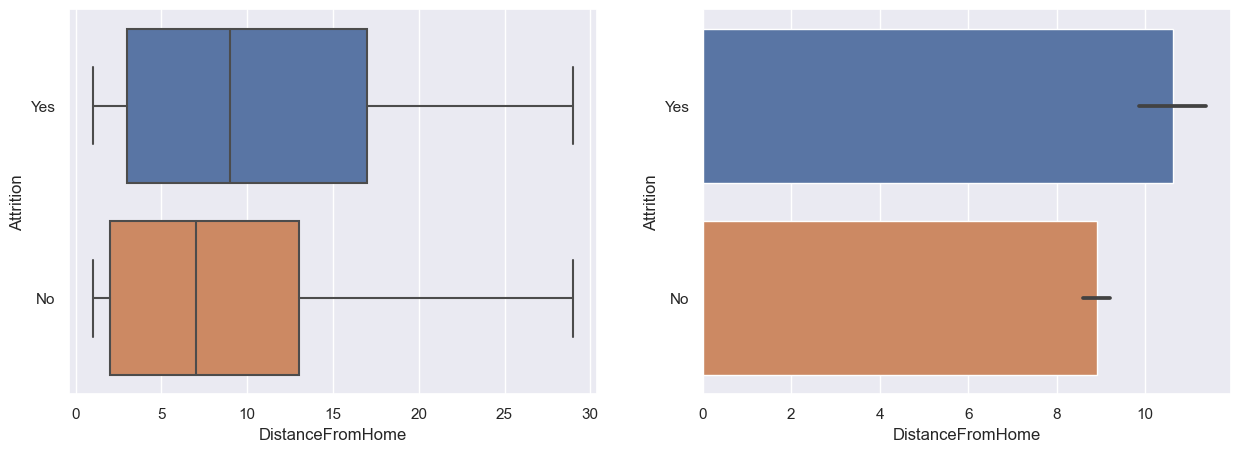

In [41]:
multi_graph('DistanceFromHome')

#### Insight:
- There is chance of attrition is increasing when the Distance From Home is greater than about 8 - 10 kms.

### Monthly Income vs Attrition

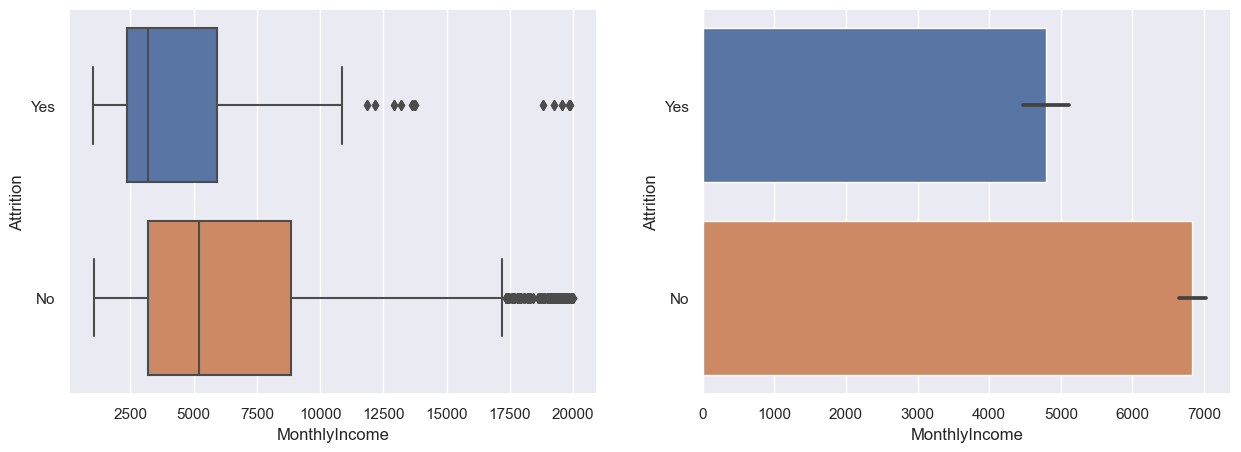

In [42]:
multi_graph('MonthlyIncome')

#### Insights:
- The Employees having monthly salary less than 5000 have the highest attrition chances.

## NumCompaniesWorked VS Attrition

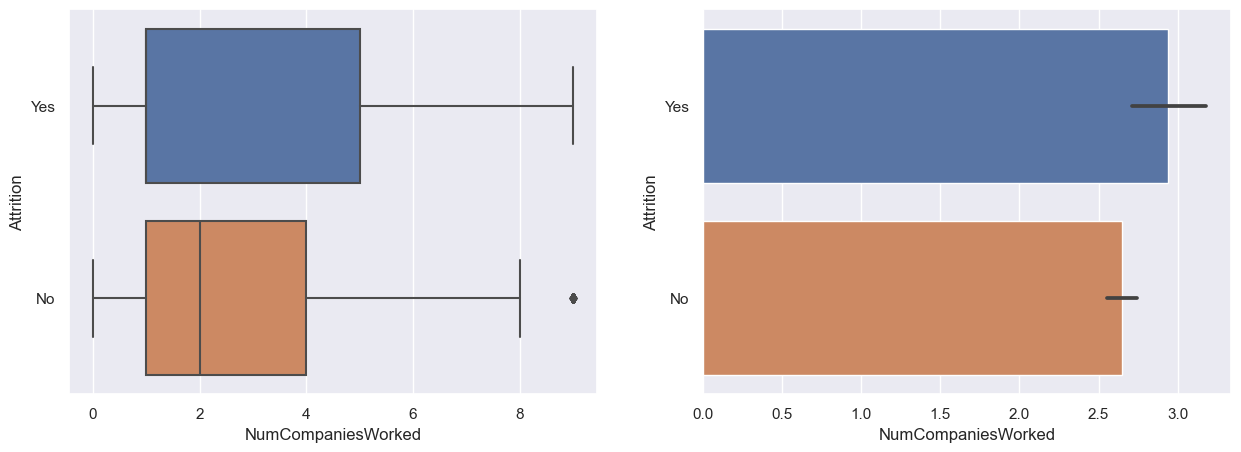

In [43]:
multi_graph('NumCompaniesWorked')

#### Insight
- The employee having higher number of companies worked have high chances of attrition

### PercentSalaryHike vs Attrition

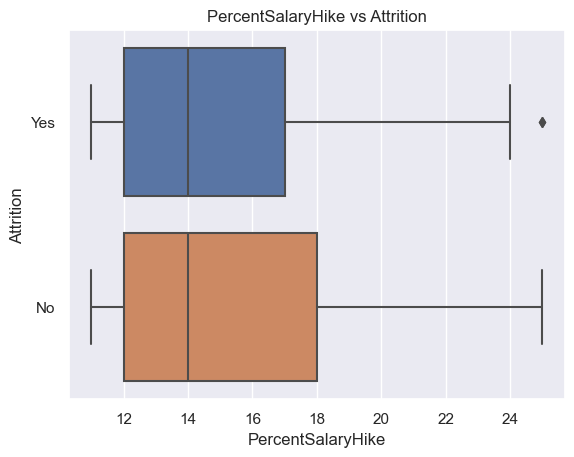

In [44]:
boxplot('PercentSalaryHike')

### TotalWorkingYears vs Attrition

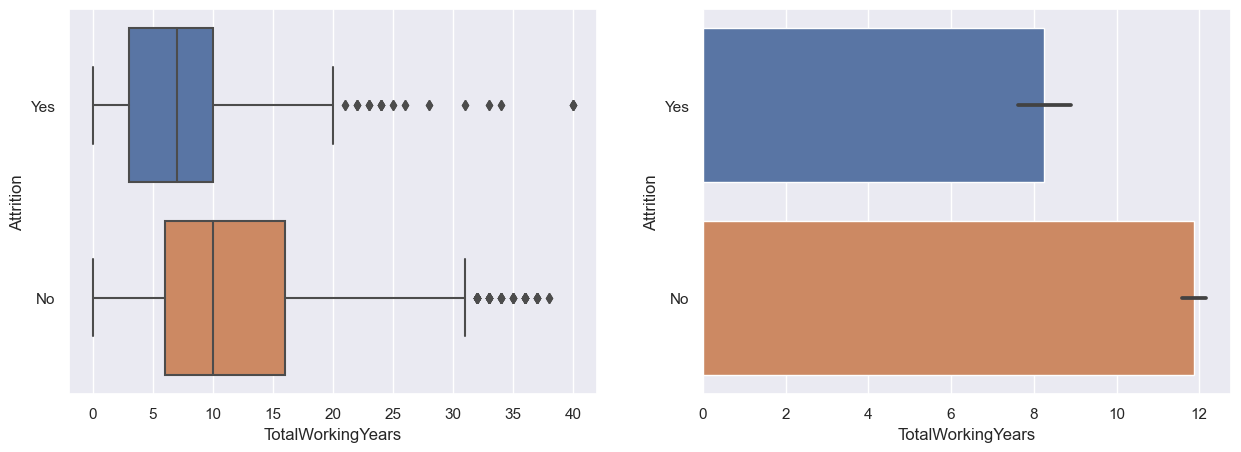

In [45]:
multi_graph('TotalWorkingYears')

#### Insights:
- The employee who have less number of total working years have the high chance of Attrition

### TrainingTimesLastYear vs Attrition

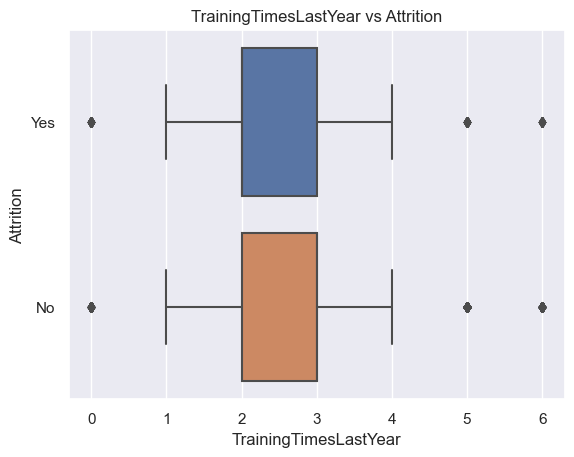

In [46]:
boxplot('TrainingTimesLastYear')

### YearsAtCompany VS Attrition

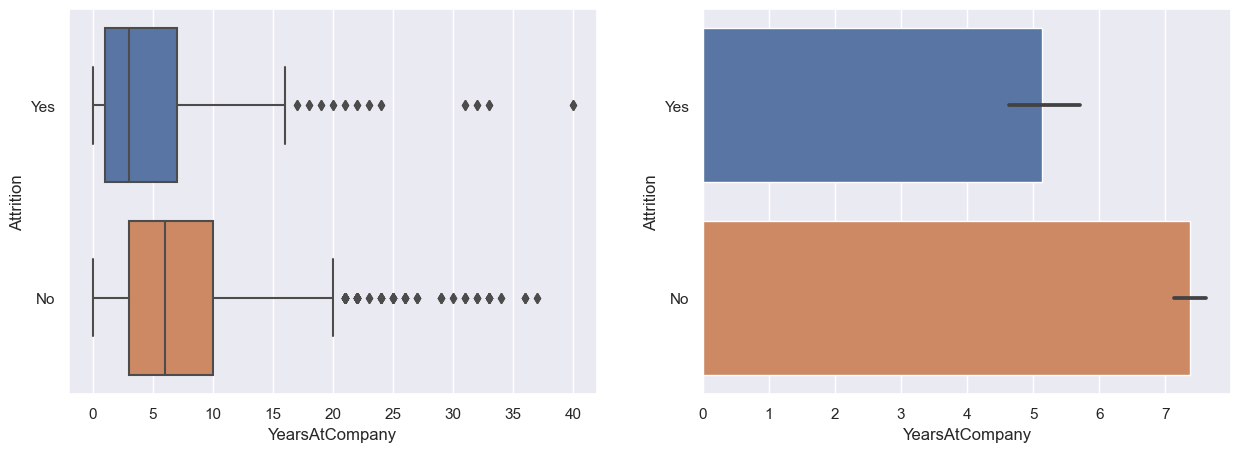

In [47]:
multi_graph('YearsAtCompany')

#### Insights:
- The graph is clearly showing that Employees who have been in company for less than 5 years have high chances of Attrition

## YearsInCurrentRole VS Attrition

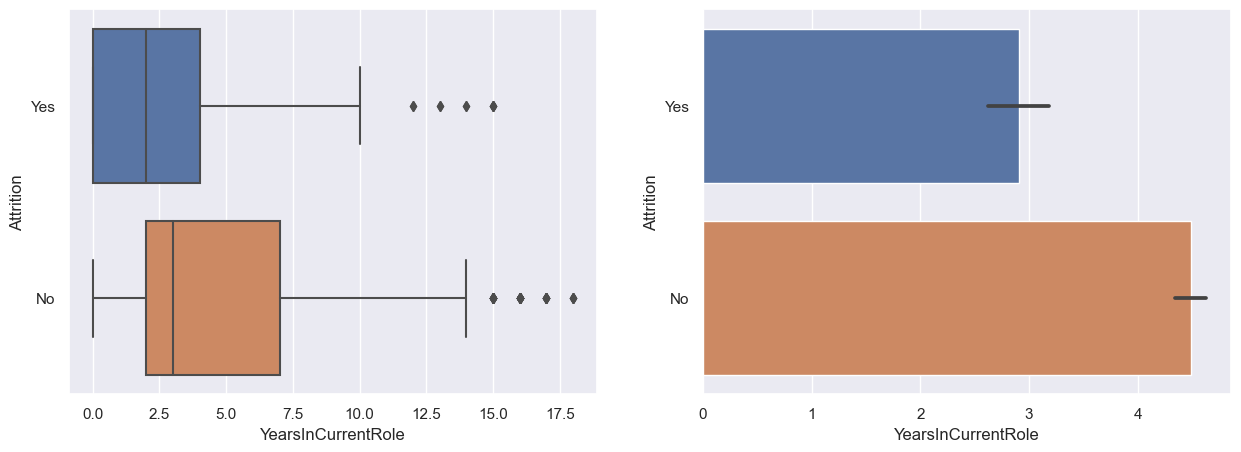

In [48]:
multi_graph('YearsInCurrentRole')

#### Insights:
- The employees who have been in the same role for less 3 years have high chances of attrition

## YearsSinceLastPromotion VS Attrition

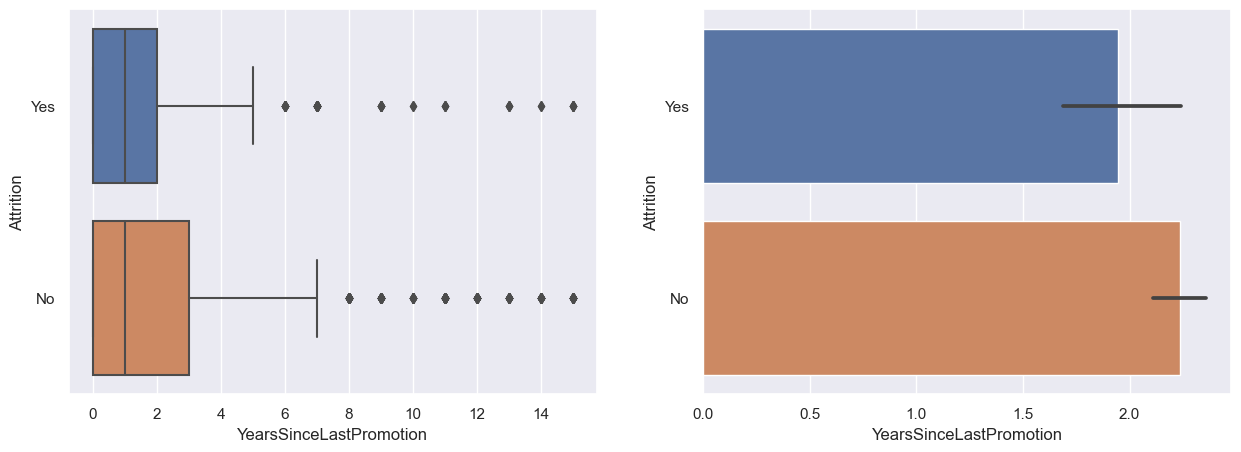

In [49]:
multi_graph('YearsSinceLastPromotion')

## YearsWithCurrManager VS Attrition

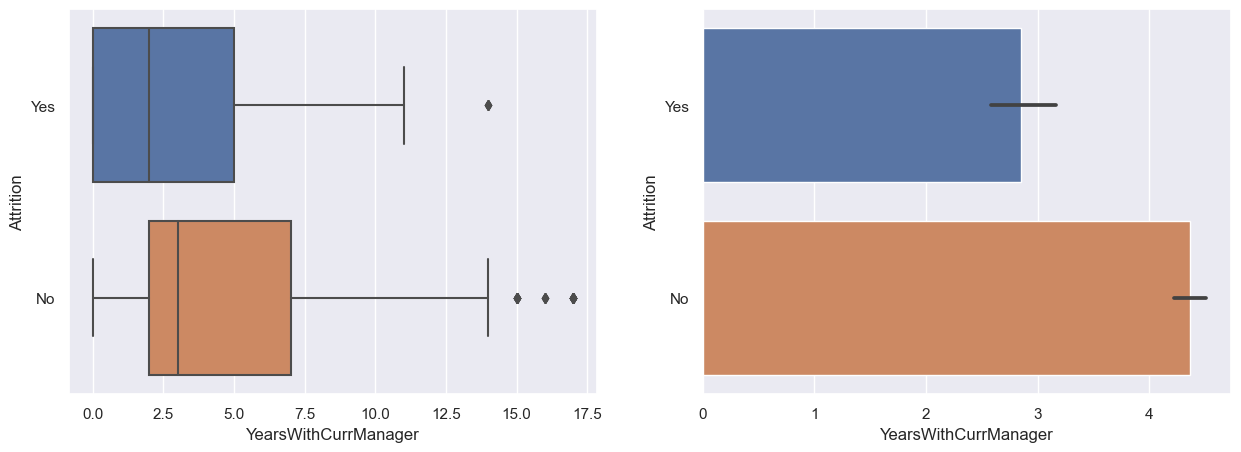

In [50]:
multi_graph('YearsWithCurrManager')

## Correlation 

In [150]:
hr=hr_copy.copy()

In [151]:
corr_mat=hr.corr()


### Creating a Correlation HeatMap

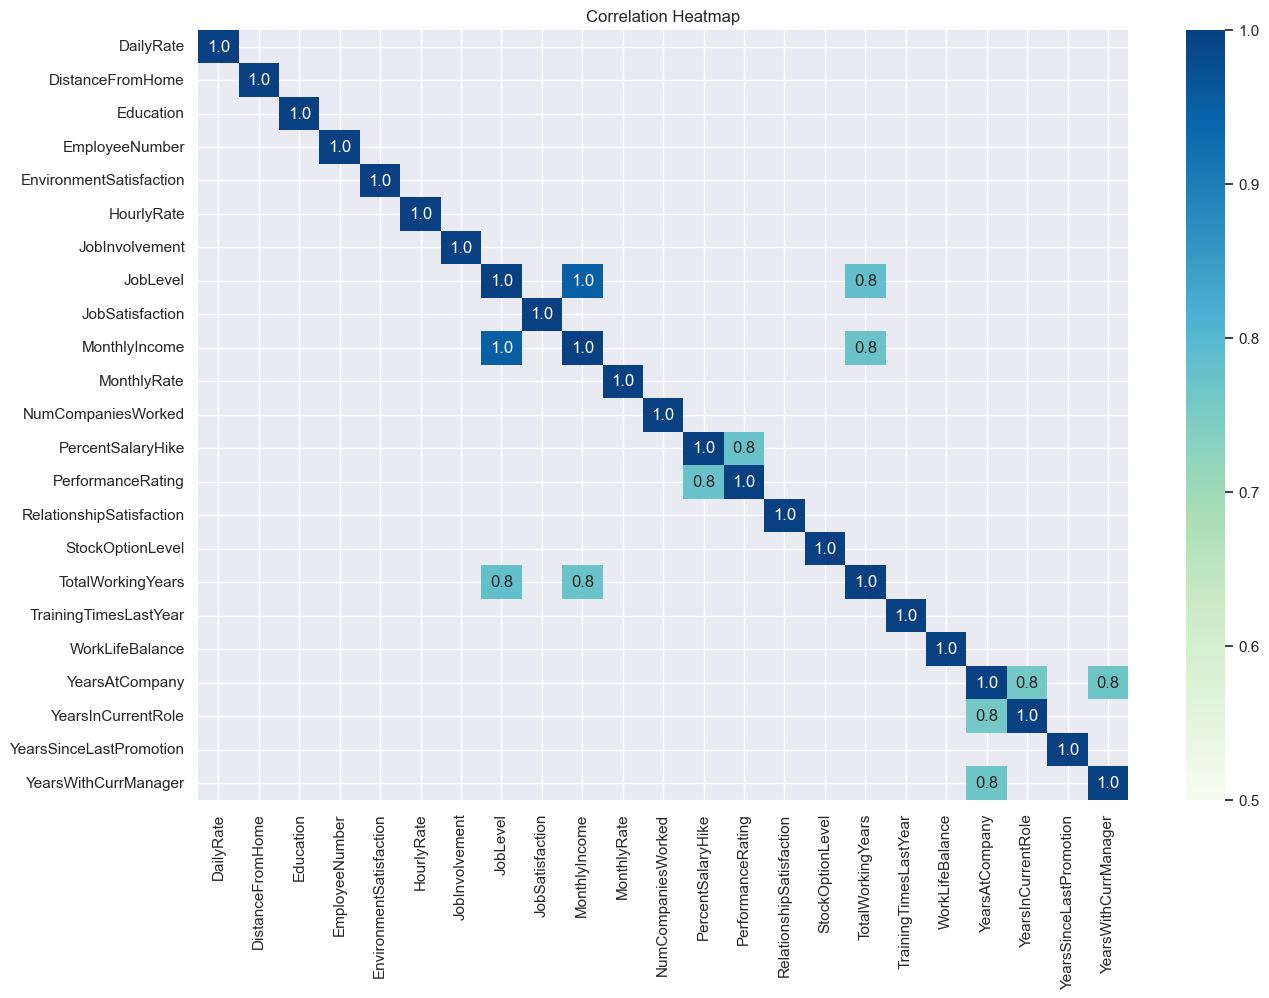

In [152]:
# Select correlations greater than 0.75
high_corr_mat = corr_mat[abs(corr_mat) >= 0.75]

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

#### Fetching the names of the highly correlated coulmns from the above matrix

In [153]:
corr_col=set()
for i in range(len(corr_mat.columns)):
    for j in range(i):
        if abs(corr_mat.iloc[i,j])>0.75:
            column_name=corr_mat.columns[i]
            corr_col.add(column_name)
print(corr_col)

{'MonthlyIncome', 'YearsWithCurrManager', 'PerformanceRating', 'TotalWorkingYears', 'YearsInCurrentRole'}


#### Dropping the Correlated Columns

In [154]:
hr.drop(["JobLevel","PerformanceRating","YearsAtCompany","TotalWorkingYears"],axis=1,inplace=True)

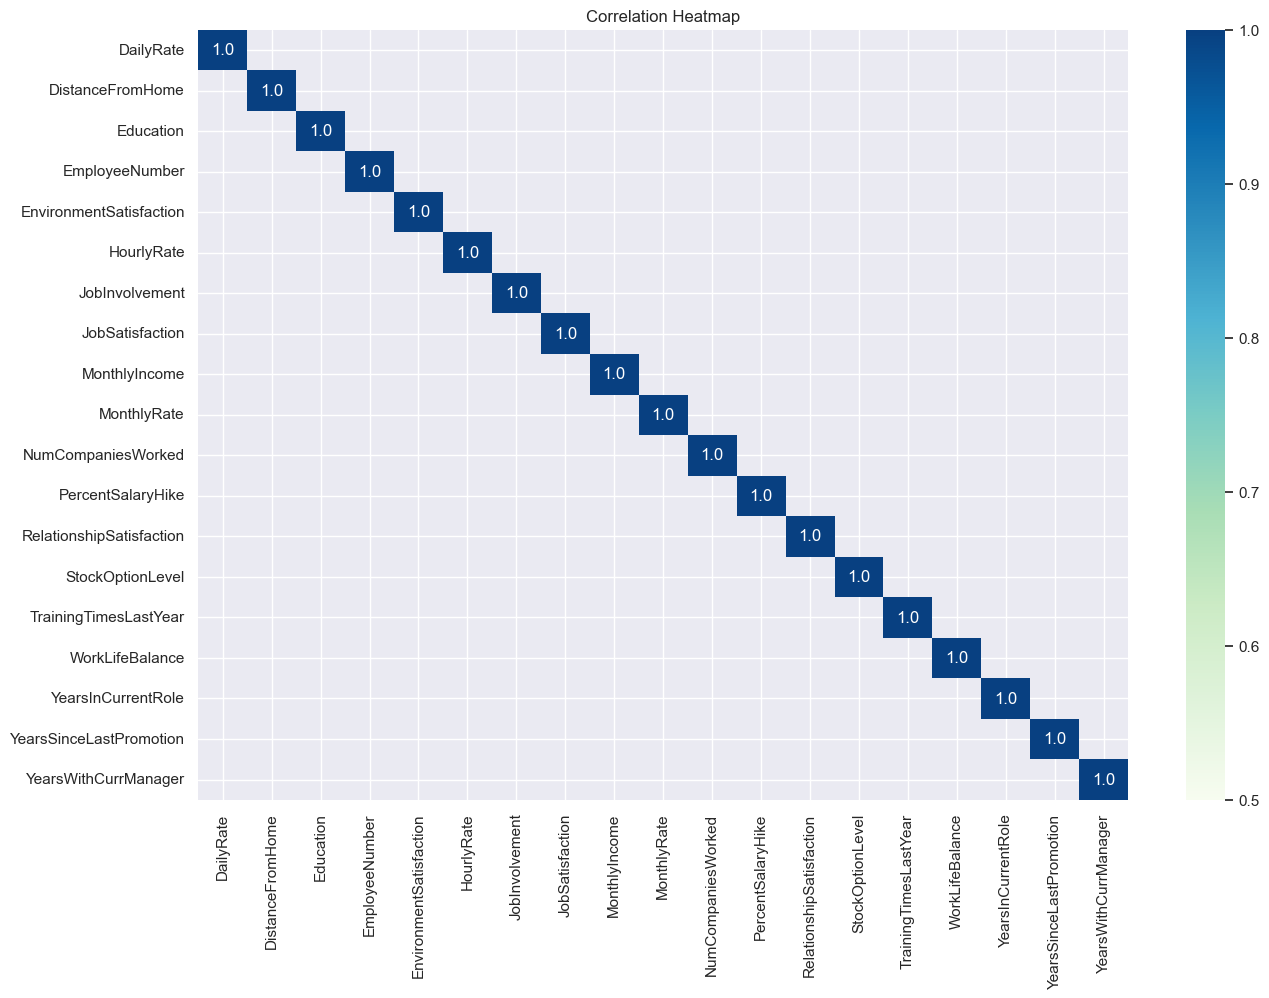

In [155]:
# Select correlations greater than 0.75
corr_mat=hr.corr()
high_corr_mat = corr_mat[abs(corr_mat) >= 0.75]

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

In [161]:
print(hr.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


## Feature Scaling

In [158]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [163]:
hr[["EmployeeNumber",'HourlyRate','MonthlyIncome','MonthlyRate']]=sc.fit_transform(hr[["EmployeeNumber",'HourlyRate','MonthlyIncome','MonthlyRate']])

## Data Preprocessing

In [164]:
hr.shape

(2940, 28)

In [165]:
hr =pd.get_dummies(data=hr, 
                   columns=['Age', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],
                   drop_first=True
                )

In [166]:
hr.shape

(2940, 44)

In [167]:
hr["Attrition"].value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

In [168]:
hr["Attrition"]=hr["Attrition"].replace({'Yes':1,"No":0})

In [169]:
hr["Attrition"].value_counts()

0    2466
1     474
Name: Attrition, dtype: int64

In [170]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Attrition                          2940 non-null   int64  
 1   DailyRate                          2940 non-null   int64  
 2   DistanceFromHome                   2940 non-null   int64  
 3   Education                          2940 non-null   int64  
 4   EmployeeNumber                     2940 non-null   float64
 5   EnvironmentSatisfaction            2940 non-null   int64  
 6   HourlyRate                         2940 non-null   float64
 7   JobInvolvement                     2940 non-null   int64  
 8   JobSatisfaction                    2940 non-null   int64  
 9   MonthlyIncome                      2940 non-null   float64
 10  MonthlyRate                        2940 non-null   float64
 11  NumCompaniesWorked                 2940 non-null   int64

## Splitting the Data

In [171]:
x=hr.drop(["Attrition"],axis=1)
y=hr[["Attrition"]]

In [172]:
print(x.shape)
print(y.shape)

(2940, 43)
(2940, 1)


In [173]:
y.value_counts()

Attrition
0            2466
1             474
dtype: int64

In [174]:
# Blancing the dataset 
from imblearn.over_sampling import SMOTE
smote =SMOTE()
x_smote, y_smote =smote.fit_resample(x,y)

In [175]:
y_smote.value_counts()

Attrition
0            2466
1            2466
dtype: int64

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size=0.2, random_state=53)

In [178]:
print(x_train.shape)
print()
print(x_test.shape)
print()
print(y_train.shape)
print()
print(y_test.shape)

(3945, 43)

(987, 43)

(3945, 1)

(987, 1)


## Model Building

In [179]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

### 1) Decision Tree Classifier

In [180]:
from sklearn.tree import DecisionTreeClassifier
dtree_gini=DecisionTreeClassifier()

#### Critetion = Gini

In [181]:
dt_gini=dtree_gini.fit(x_train, y_train)
y_pred_train_dt_gini=dt_gini.predict(x_train)
y_pred_test_dt_gini=dt_gini.predict(x_test)

# Accuarcy Score
## Training and Testing
print("Training Accuracy: " ,accuracy_score(y_train,y_pred_train_dt_gini))
print("Testing Accuracy: ",accuracy_score(y_test,y_pred_test_dt_gini))
print()

# Classification Report 
print("Training")
print(classification_report(y_train,y_pred_train_dt_gini))
print()
print("Testing")
print(classification_report(y_test,y_pred_test_dt_gini))
print()

Training Accuracy:  1.0
Testing Accuracy:  0.9625126646403243

Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1985
           1       1.00      1.00      1.00      1960

    accuracy                           1.00      3945
   macro avg       1.00      1.00      1.00      3945
weighted avg       1.00      1.00      1.00      3945


Testing
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       481
           1       0.96      0.97      0.96       506

    accuracy                           0.96       987
   macro avg       0.96      0.96      0.96       987
weighted avg       0.96      0.96      0.96       987




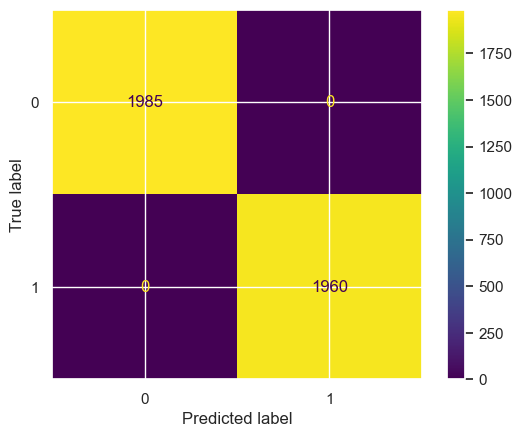

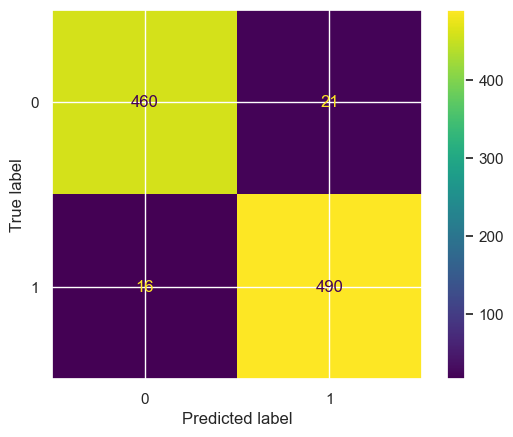

In [182]:
# Confusion Matrix
print(ConfusionMatrixDisplay.from_predictions(y_train,y_pred_train_dt_gini))
print()
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test_dt_gini))

#### Critetion = Entropy

In [183]:
dtree_entropy=DecisionTreeClassifier(criterion='entropy')

In [184]:
dt_entropy=dtree_entropy.fit(x_train, y_train)
y_pred_train_dt_entropy =dt_entropy.predict(x_train)
y_pred_test_dt_entropy=dt_entropy.predict(x_test)

# Accuarcy Score
## Training and Testing
print("Training Accuracy: " ,accuracy_score(y_train,y_pred_train_dt_entropy))
print("Testing Accuracy: ",accuracy_score(y_test,y_pred_test_dt_entropy))
print()

# Classification Report 
print("Training")
print(classification_report(y_train,y_pred_train_dt_entropy))
print()
print("Testing")
print(classification_report(y_test,y_pred_test_dt_entropy))
print()

Training Accuracy:  1.0
Testing Accuracy:  0.9675785207700102

Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1985
           1       1.00      1.00      1.00      1960

    accuracy                           1.00      3945
   macro avg       1.00      1.00      1.00      3945
weighted avg       1.00      1.00      1.00      3945


Testing
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       481
           1       0.97      0.97      0.97       506

    accuracy                           0.97       987
   macro avg       0.97      0.97      0.97       987
weighted avg       0.97      0.97      0.97       987




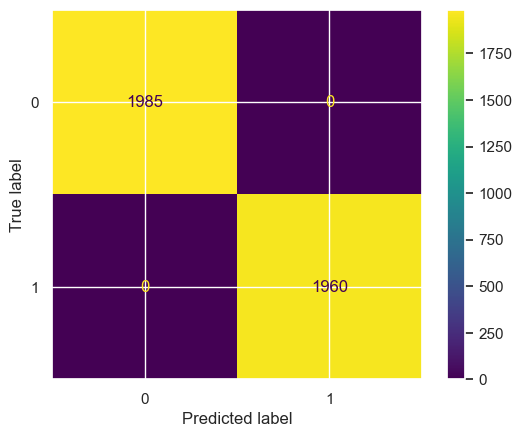

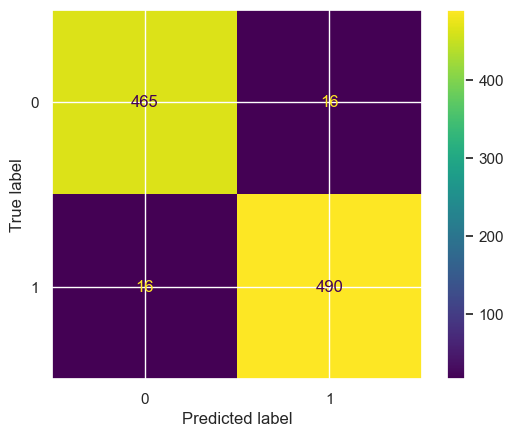

In [185]:
# Confusion Matrix
print(ConfusionMatrixDisplay.from_predictions(y_train,y_pred_train_dt_entropy))
print()
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test_dt_entropy))

### 2) Random Forest Classifier

In [186]:
from sklearn.ensemble import RandomForestClassifier
rforest=RandomForestClassifier()

In [187]:
rf = rforest.fit(x_train, y_train)
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

# Accuracy Score 
print("Training Accuracy: ", accuracy_score(y_train, y_pred_train_rf))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_test_rf))
print()

# Classification Report 
print("Training")
print(classification_report(y_train, y_pred_train_rf))
print()
print("Testing")
print(classification_report(y_test, y_pred_test_rf))

Training Accuracy:  1.0
Testing Accuracy:  0.9929078014184397

Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1985
           1       1.00      1.00      1.00      1960

    accuracy                           1.00      3945
   macro avg       1.00      1.00      1.00      3945
weighted avg       1.00      1.00      1.00      3945


Testing
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       481
           1       1.00      0.99      0.99       506

    accuracy                           0.99       987
   macro avg       0.99      0.99      0.99       987
weighted avg       0.99      0.99      0.99       987



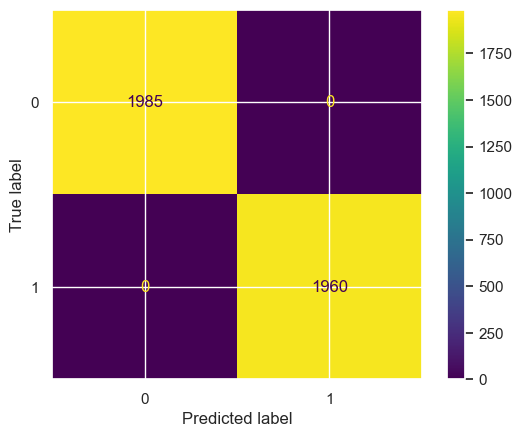

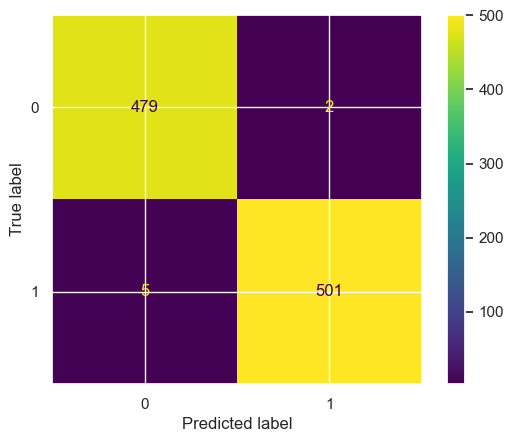

In [188]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_rf)
print()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_rf)

### 3) Logistic Regression Classifier 

In [189]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()

In [190]:
lr =logistic.fit(x_train, y_train)

y_pred_train_lr = lr.predict(x_train)
y_pred_test_lr = lr.predict(x_test)

# Accuracy Score 
print("Training Accuracy: ", accuracy_score(y_train, y_pred_train_lr))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_test_lr))
print()

# Classification Report 
print("Training")
print(classification_report(y_train, y_pred_train_lr))
print()
print("Testing")
print(classification_report(y_test, y_pred_test_lr))

Training Accuracy:  0.7992395437262357
Testing Accuracy:  0.8237082066869301

Training
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1985
           1       0.80      0.79      0.80      1960

    accuracy                           0.80      3945
   macro avg       0.80      0.80      0.80      3945
weighted avg       0.80      0.80      0.80      3945


Testing
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       481
           1       0.83      0.82      0.83       506

    accuracy                           0.82       987
   macro avg       0.82      0.82      0.82       987
weighted avg       0.82      0.82      0.82       987



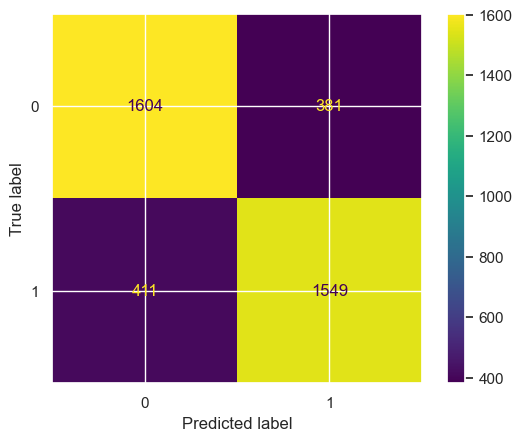

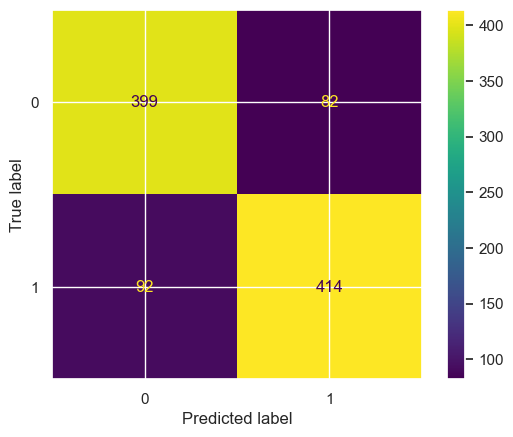

In [191]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_lr)
print()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_lr)

### 4) XG-Boost Classifier

In [192]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()

In [193]:
xgb= xgboost.fit(x_train, y_train)

y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

# Accuracy Score 
print("Training Accuracy: ", accuracy_score(y_train, y_pred_train_xgb))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_test_xgb))
print()

# Classification Report 
print("Training")
print(classification_report(y_train, y_pred_train_xgb))
print()
print("Testing")
print(classification_report(y_test, y_pred_test_xgb))

Training Accuracy:  1.0
Testing Accuracy:  0.9929078014184397

Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1985
           1       1.00      1.00      1.00      1960

    accuracy                           1.00      3945
   macro avg       1.00      1.00      1.00      3945
weighted avg       1.00      1.00      1.00      3945


Testing
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       481
           1       0.99      0.99      0.99       506

    accuracy                           0.99       987
   macro avg       0.99      0.99      0.99       987
weighted avg       0.99      0.99      0.99       987



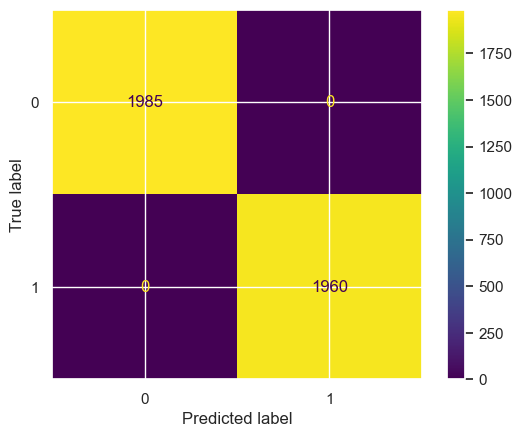

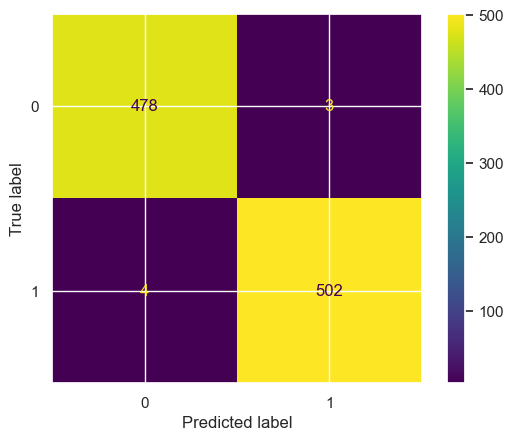

In [194]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_xgb)
print()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_xgb)

### 5) SVM Classifier 

In [195]:
from sklearn.svm import SVC
svc=SVC()

In [196]:
svm = svc.fit(x_train, y_train)

y_pred_train_svm = svm.predict(x_train)
y_pred_test_svm = svm.predict(x_test)

# Accuracy Score 
print("Training Accuracy: ", accuracy_score(y_train, y_pred_train_svm))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_test_svm))
print()

# Classification Report 
print("Training")
print(classification_report(y_train, y_pred_train_svm))
print()
print("Testing")
print(classification_report(y_test, y_pred_test_svm))

Training Accuracy:  0.5465145754119138
Testing Accuracy:  0.5217831813576495

Training
              precision    recall  f1-score   support

           0       0.55      0.56      0.56      1985
           1       0.54      0.53      0.54      1960

    accuracy                           0.55      3945
   macro avg       0.55      0.55      0.55      3945
weighted avg       0.55      0.55      0.55      3945


Testing
              precision    recall  f1-score   support

           0       0.51      0.52      0.51       481
           1       0.53      0.53      0.53       506

    accuracy                           0.52       987
   macro avg       0.52      0.52      0.52       987
weighted avg       0.52      0.52      0.52       987



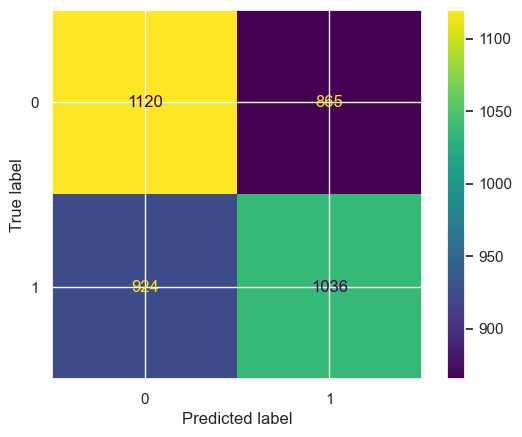

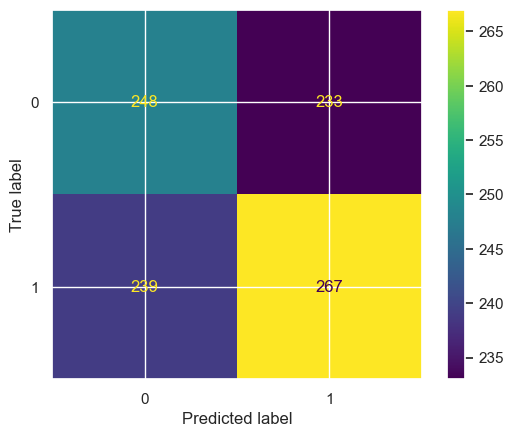

In [197]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_svm)
print()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_svm)

## Stacking Model

In [198]:
from sklearn.ensemble import StackingClassifier

In [199]:
estimators =[('Decision_Tree',dt_gini),('Logistic_Regg',lr),('XGBoost',xgb),('SVM',svm)]

In [200]:
classifier=StackingClassifier(estimators=estimators, final_estimator=rf, cv=10)

In [201]:
classifier.fit(x_train,y_train)

StackingClassifier(cv=10,
                   estimators=[('Decision_Tree', DecisionTreeClassifier()),
                               ('Logistic_Regg', LogisticRegression()),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('SVM', SVC())],
                   final_estimator=RandomForestClassifier())

In [202]:
y_pred_train_stacking = classifier.predict(x_train)
y_pred_test_stacking = classifier.predict(x_test)

# Accuracy Score 
print("Training Accuracy: ", accuracy_score(y_train, y_pred_train_stacking))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_test_stacking))
print()

# Classification Report 
print("Training")
print(classification_report(y_train, y_pred_train_stacking))
print()
print("Testing")
print(classification_report(y_test, y_pred_test_stacking))

Training Accuracy:  1.0
Testing Accuracy:  0.993920972644377

Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1985
           1       1.00      1.00      1.00      1960

    accuracy                           1.00      3945
   macro avg       1.00      1.00      1.00      3945
weighted avg       1.00      1.00      1.00      3945


Testing
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       481
           1       1.00      0.99      0.99       506

    accuracy                           0.99       987
   macro avg       0.99      0.99      0.99       987
weighted avg       0.99      0.99      0.99       987



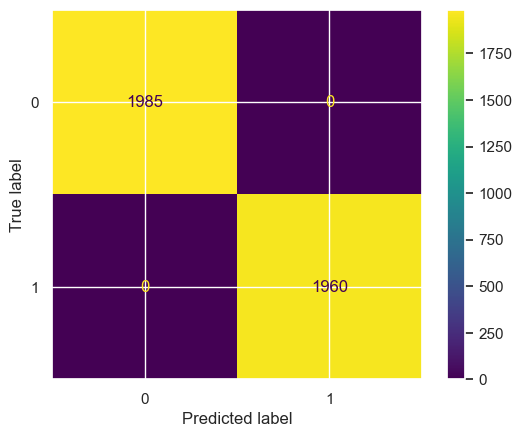

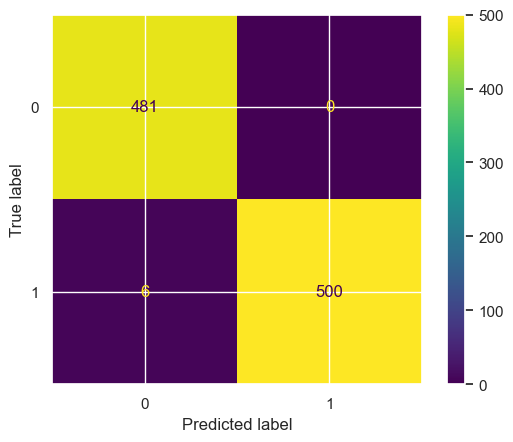

In [203]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_stacking)
print()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_stacking)

## Voting Model 

In [204]:
from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('Decision_Tree',dt_gini),('Logistic_Regg',lr),('XGBoost',xgb),('SVM',svm),('RForest',rf)])

In [205]:
voting.fit(x_train, y_train)

y_pred_train_voting = voting.predict(x_train)
y_pred_test_voting = voting.predict(x_test)

# Accuracy Score 
print("Training Accuracy: ", accuracy_score(y_train, y_pred_train_voting))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_test_voting))
print()

# Classification Report 
print("Training")
print(classification_report(y_train, y_pred_train_voting))
print()
print("Testing")
print(classification_report(y_test, y_pred_test_voting))

Training Accuracy:  1.0
Testing Accuracy:  0.9918946301925026

Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1985
           1       1.00      1.00      1.00      1960

    accuracy                           1.00      3945
   macro avg       1.00      1.00      1.00      3945
weighted avg       1.00      1.00      1.00      3945


Testing
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       481
           1       1.00      0.99      0.99       506

    accuracy                           0.99       987
   macro avg       0.99      0.99      0.99       987
weighted avg       0.99      0.99      0.99       987



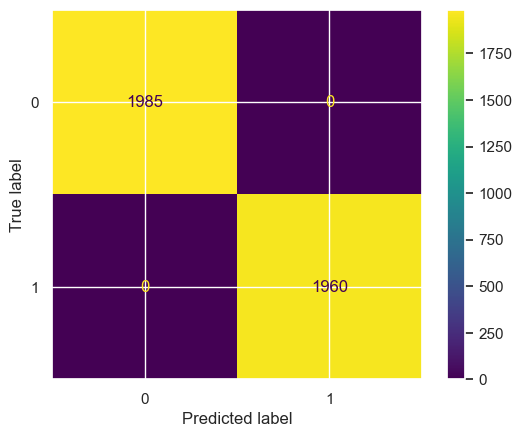

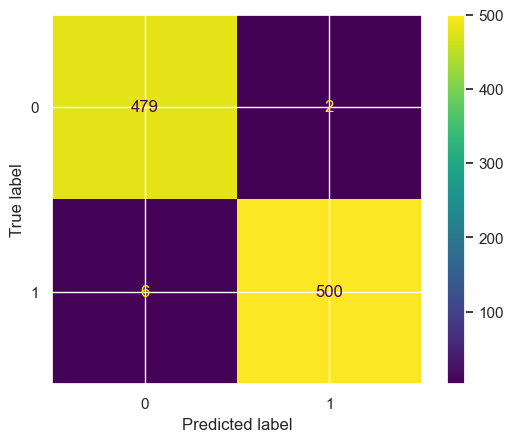

In [206]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_voting)
print()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_voting)

In [213]:
accuracy_dtree= accuracy_score(y_test, y_pred_test_dt_entropy)
accuracy_rforest= accuracy_score(y_test, y_pred_test_rf)
accuracy_logistic= accuracy_score(y_test, y_pred_test_lr)
accuracy_xgb= accuracy_score(y_test, y_pred_test_xgb)
accuracy_svm= accuracy_score(y_test, y_pred_test_svm)
accuracy_stacking= accuracy_score(y_test, y_pred_test_stacking)
accuracy_voting= accuracy_score(y_test, y_pred_test_voting)


In [214]:
models=["D_Tree", "R_Forest","Logistic","XGB","SVM","Stacking","Voting"]
accuracy=[accuracy_dtree, accuracy_rforest, accuracy_logistic, accuracy_xgb, accuracy_svm, accuracy_stacking, accuracy_voting ]

In [215]:
accuracy_df=pd.DataFrame({"Models":models, "Accuracy":accuracy})

In [216]:
accuracy_df

Models  Accuracy
0    D_Tree  0.967579
1  R_Forest  0.992908
2  Logistic  0.823708
3       XGB  0.992908
4       SVM  0.521783
5  Stacking  0.993921
6    Voting  0.991895

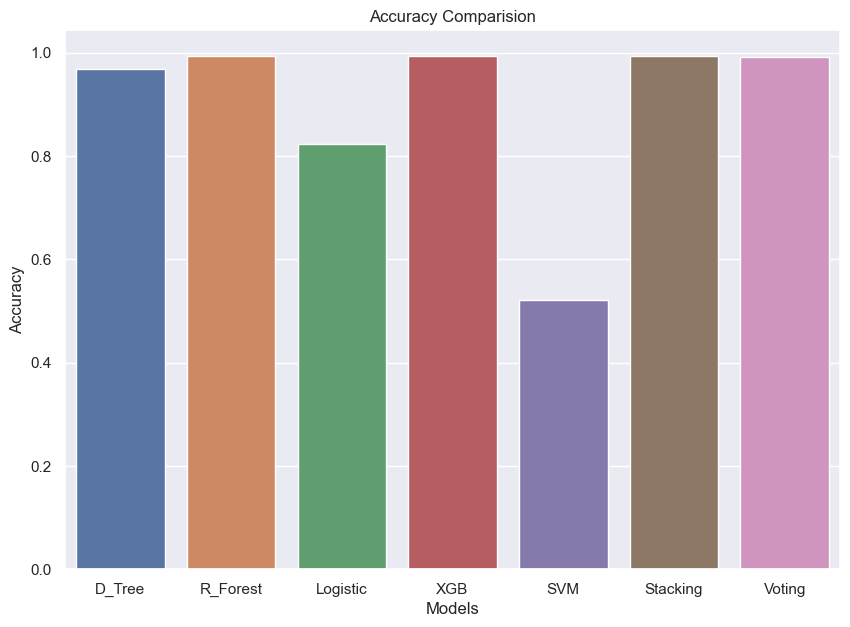

In [218]:
plt.figure(figsize=(10,7))
sns.barplot(x='Models', y="Accuracy", data=accuracy_df)
plt.title("Accuracy Comparision")
plt.show()